In [1]:
#!pip install pandas 
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

In [2]:
#Imports

import seaborn as sns
import matplotlib as plt
import pandas as pd
import missingno as msno
import numpy as np
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import fancyimpute
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
import pickle

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [3]:
# Declarations

AV = AutoViz_Class()

In [4]:
df = pd.read_csv("C:\\Users\\diana\\Downloads\\Loans\\train.csv", index_col=False)

In [5]:
df.drop(columns=['Loan_ID'])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
print('\nINFO')
print(df.info())

print('\nSHAPE')
print(df.shape)

print('\nDESCRIPTION')
df.describe().T.round(2)


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

SHAPE
(614, 13)

DESCRIPTION


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


In [7]:
df.loc[df['Dependents'] == '3+', 'Dependents'] = 3
df['Dependents'] = df['Dependents'].astype(float)

In [8]:
#for col in df.select_dtypes(include='object').columns:
#    df[col] = df[col].astype('category')

Shape of your Data Set loaded: (614, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    13 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Loan_ID']
To fix these data quality issues in the dataset, import F

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Loan_ID,object,0.000000,100,,,Possible ID column: drop before modeling step.
Gender,object,2.117264,0,,,"13 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Married,object,0.488599,0,,,"3 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Dependents,float64,2.442997,NA,0.000000,3.000000,"15 missing values. Impute them with mean, median, mode, or a constant value such as 123."
Education,object,0.000000,0,,,No issue
Self_Employed,object,5.211726,0,,,"32 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
ApplicantIncome,int64,0.000000,82,150.000000,81000.000000,Column has 50 outliers greater than upper bound (10171.25) or lower than lower bound(-1498.75). Cap them or remove them.
CoapplicantIncome,float64,0.000000,NA,0.000000,41667.000000,Column has 18 outliers greater than upper bound (5743.12) or lower than lower bound(-3445.88). Cap them or remove them.
LoanAmount,float64,3.583062,NA,9.000000,700.000000,"22 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 39 outliers greater than upper bound (270.00) or lower than lower bound(-2.00). Cap them or remove them."
Loan_Amount_Term,float64,2.280130,NA,12.000000,480.000000,"14 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 88 outliers greater than upper bound (360.00) or lower than lower bound(360.00). Cap them or remove them."


Number of All Scatter Plots = 10


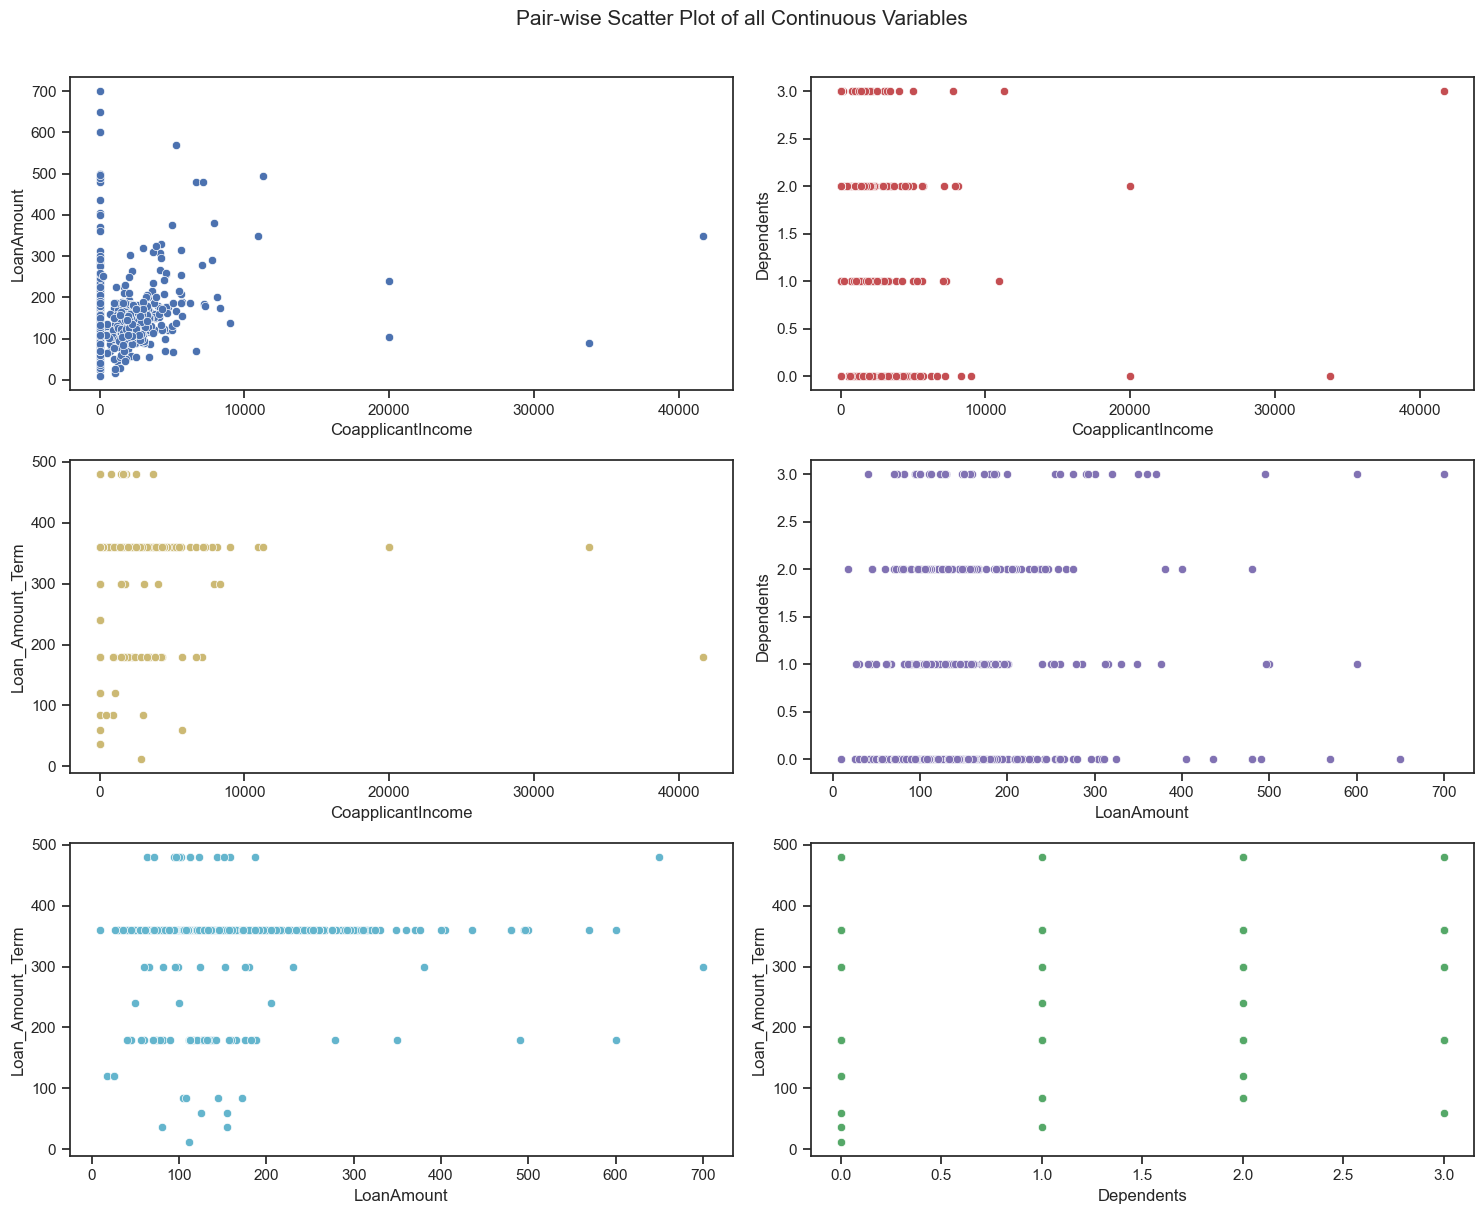

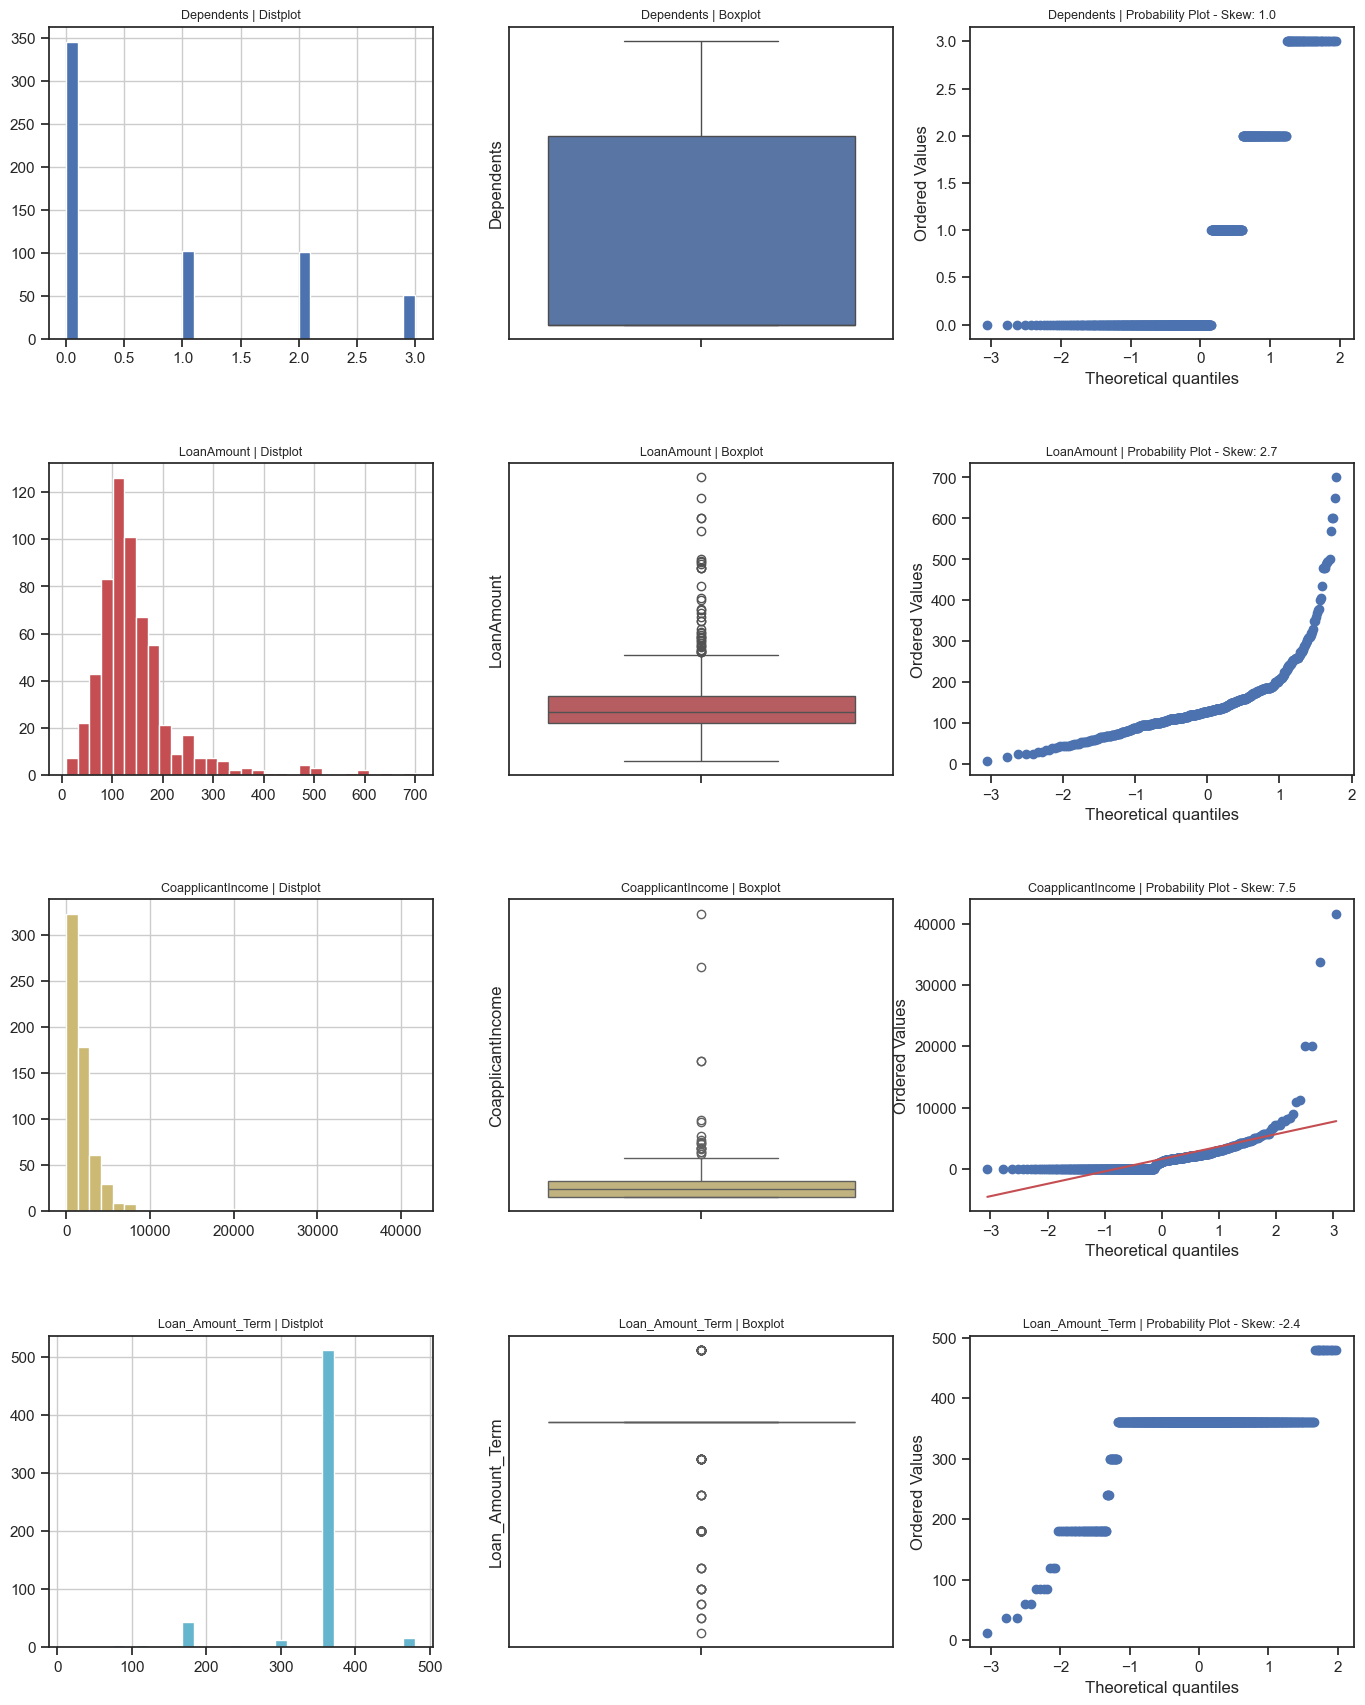

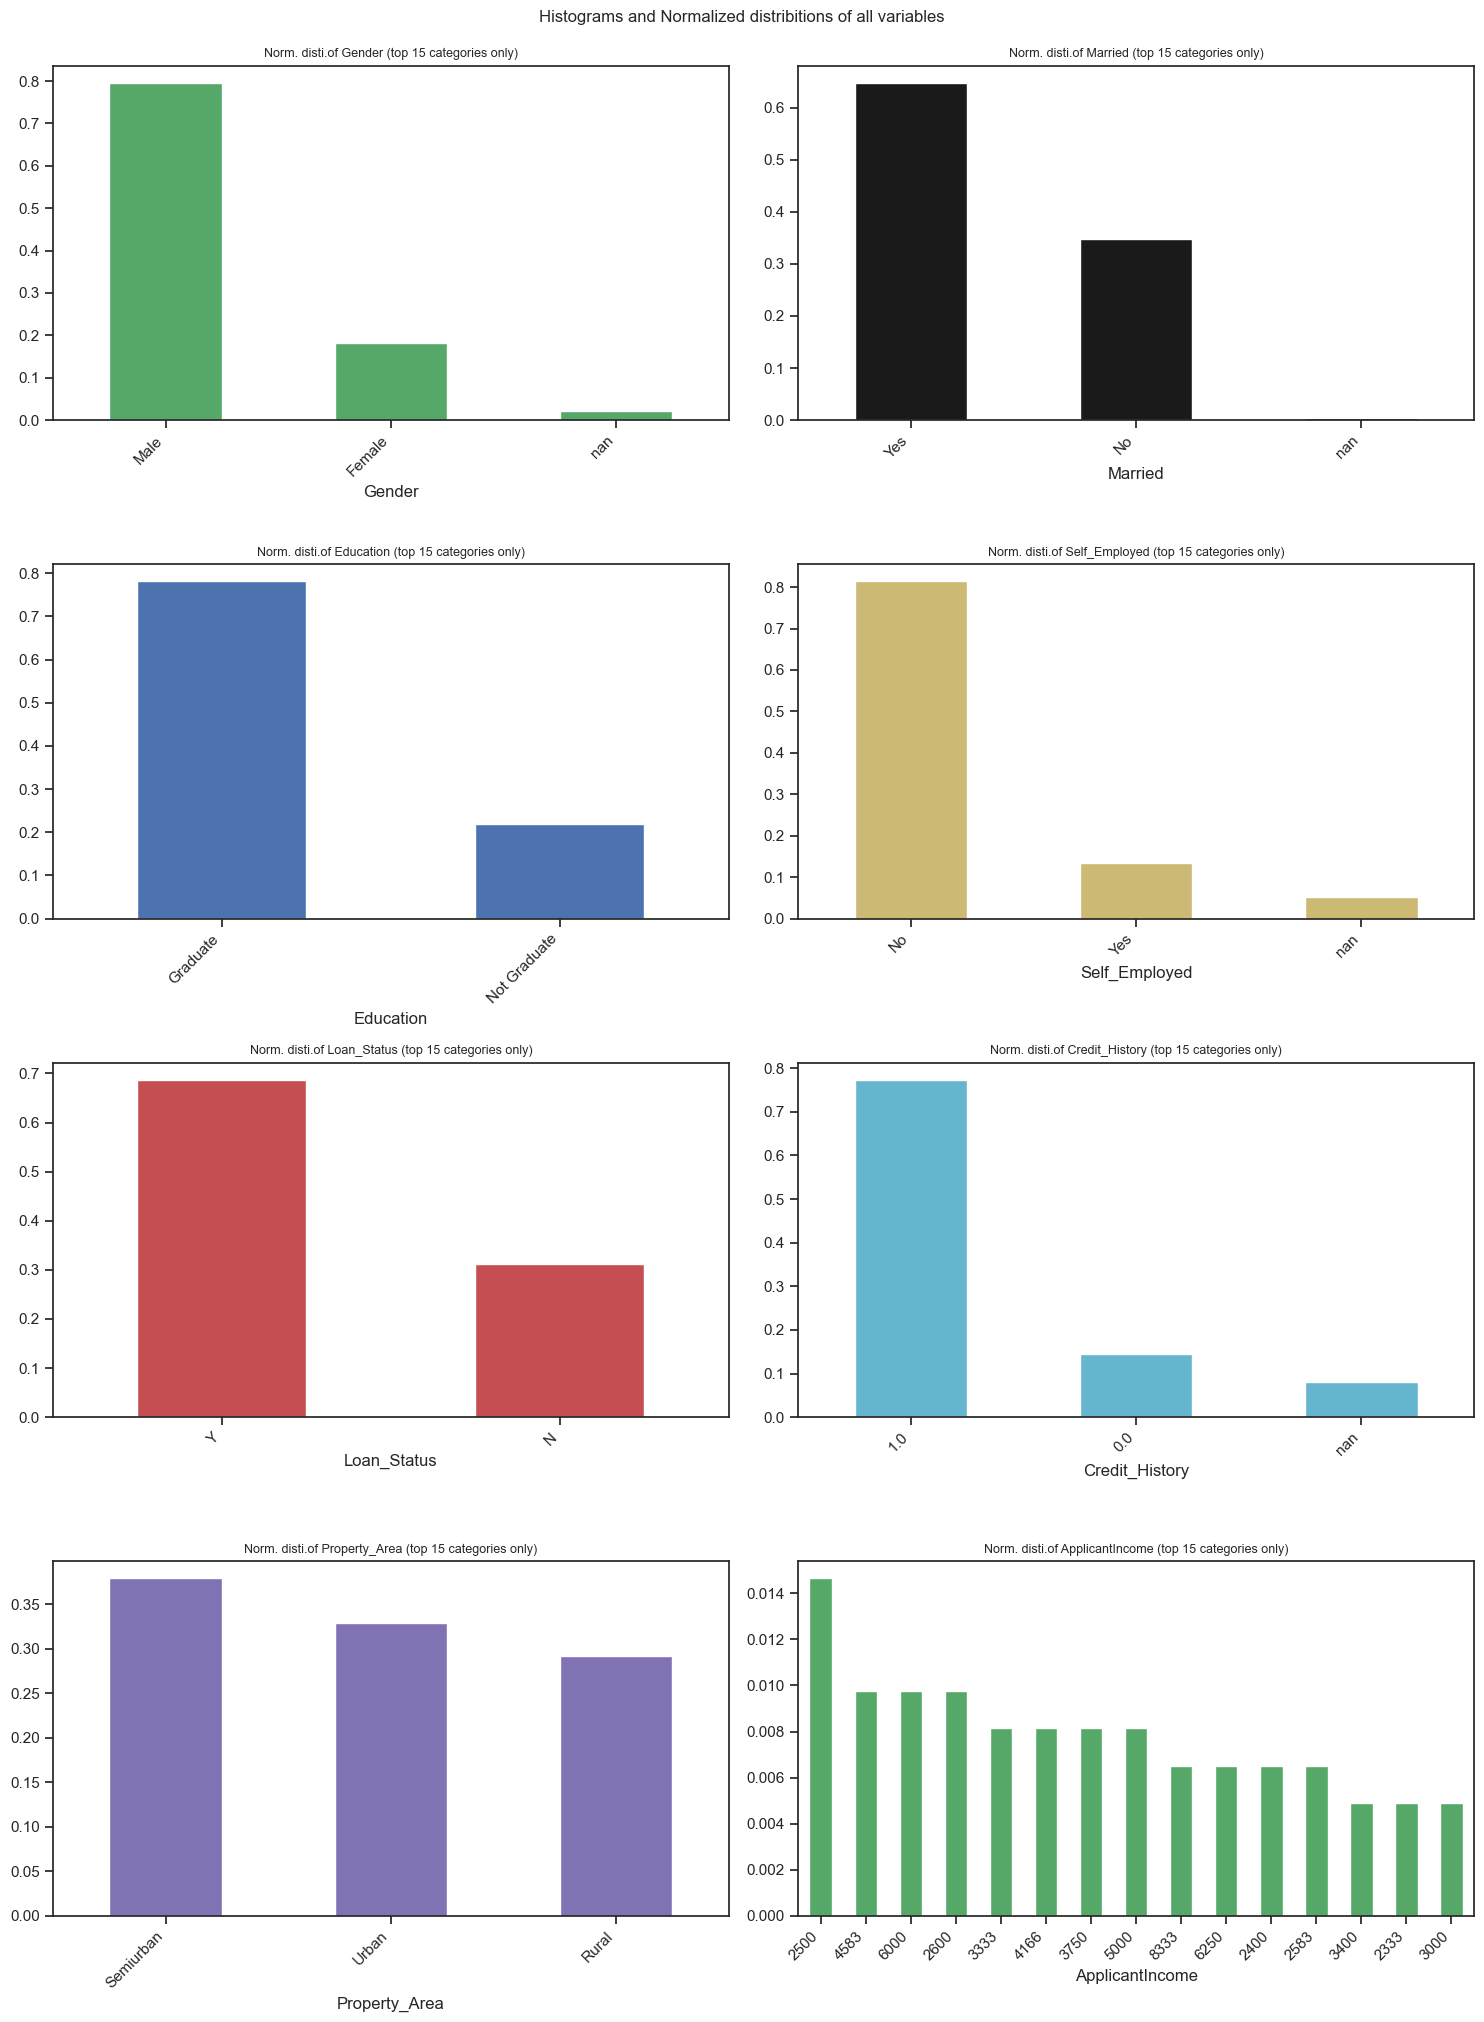

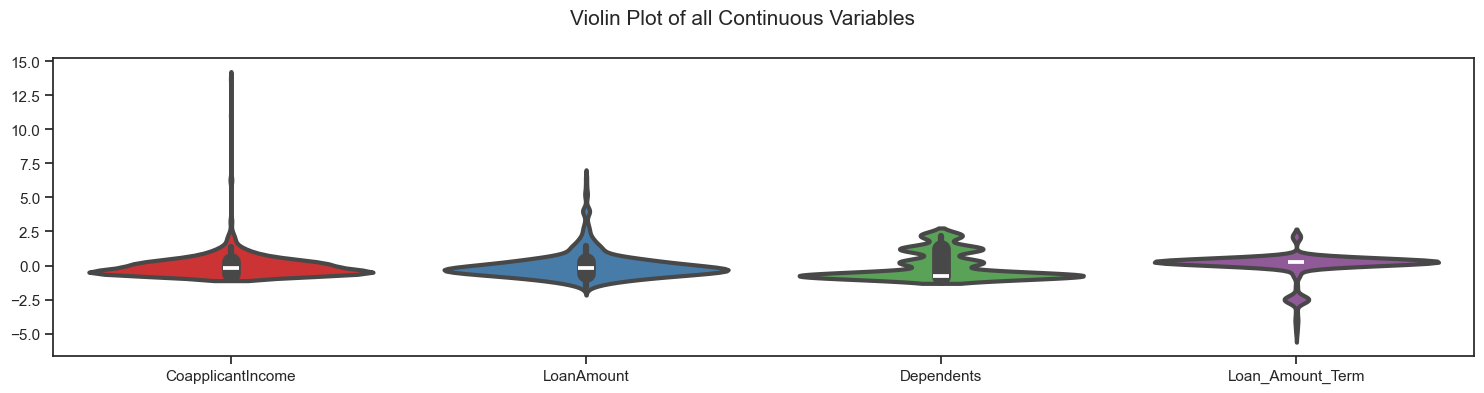

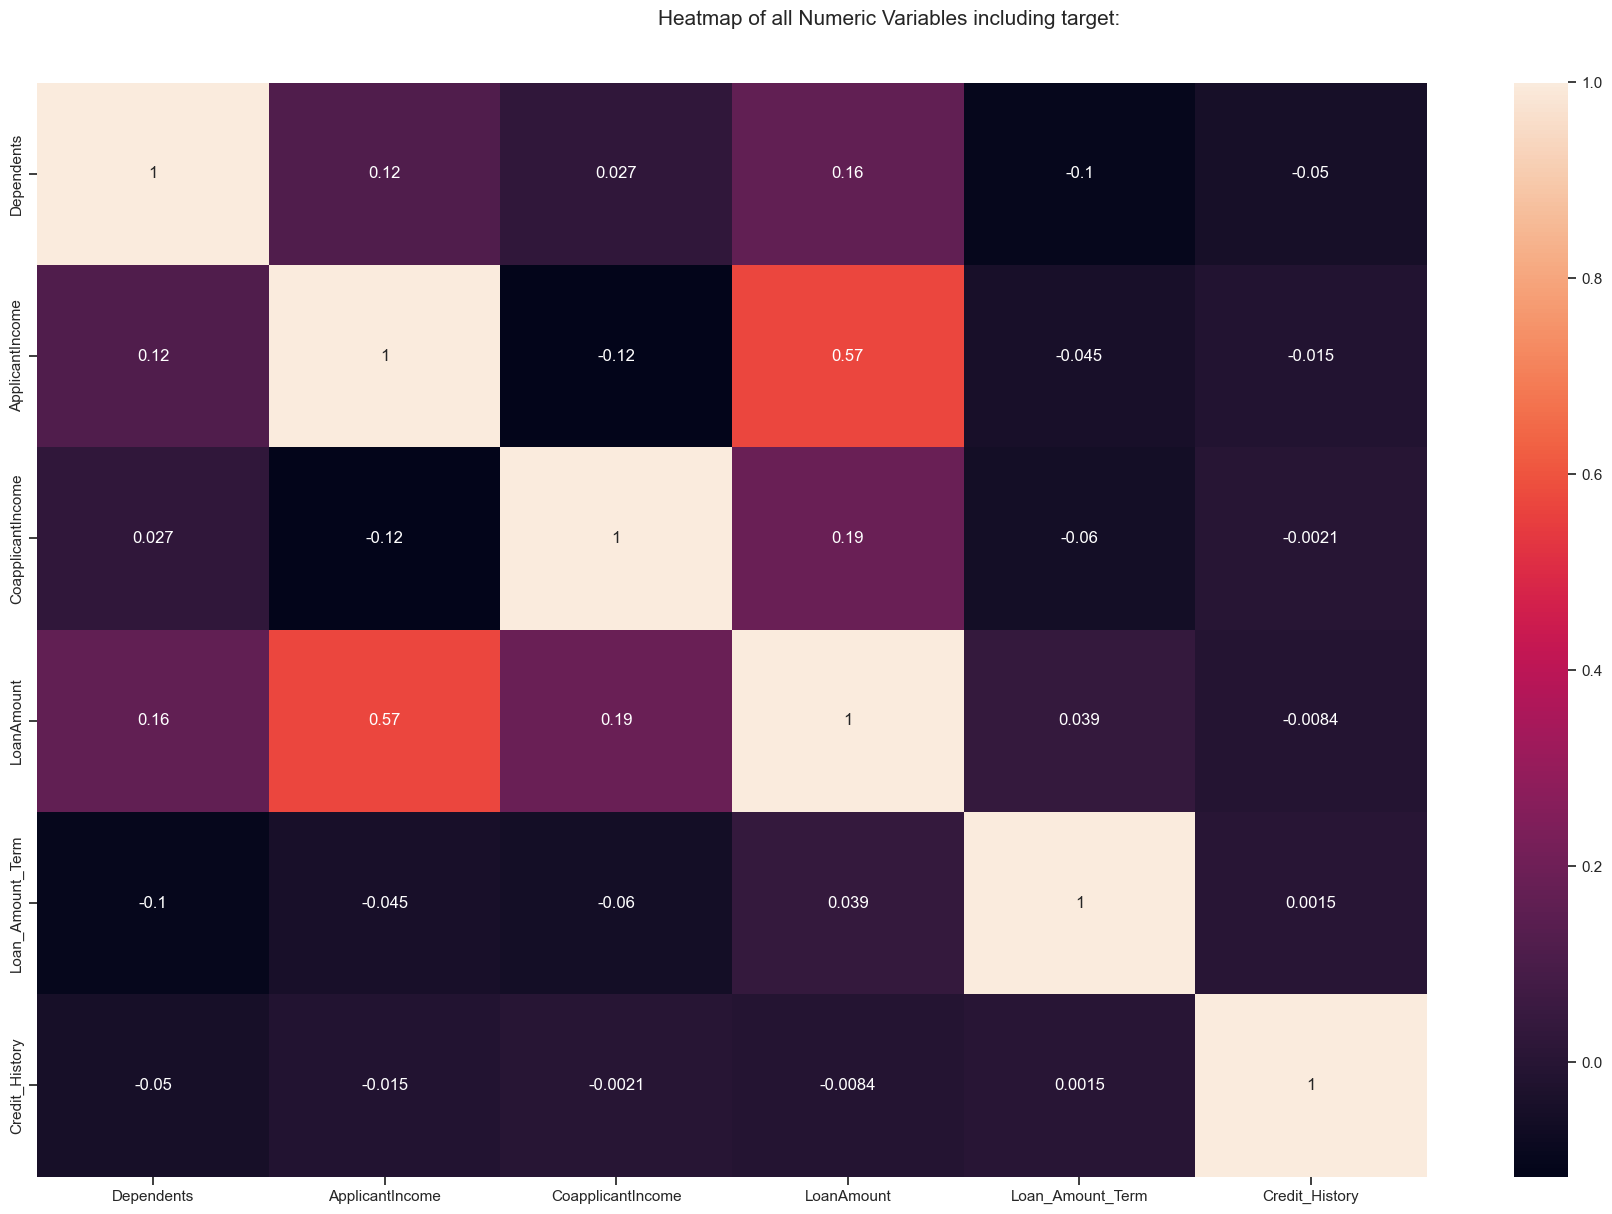

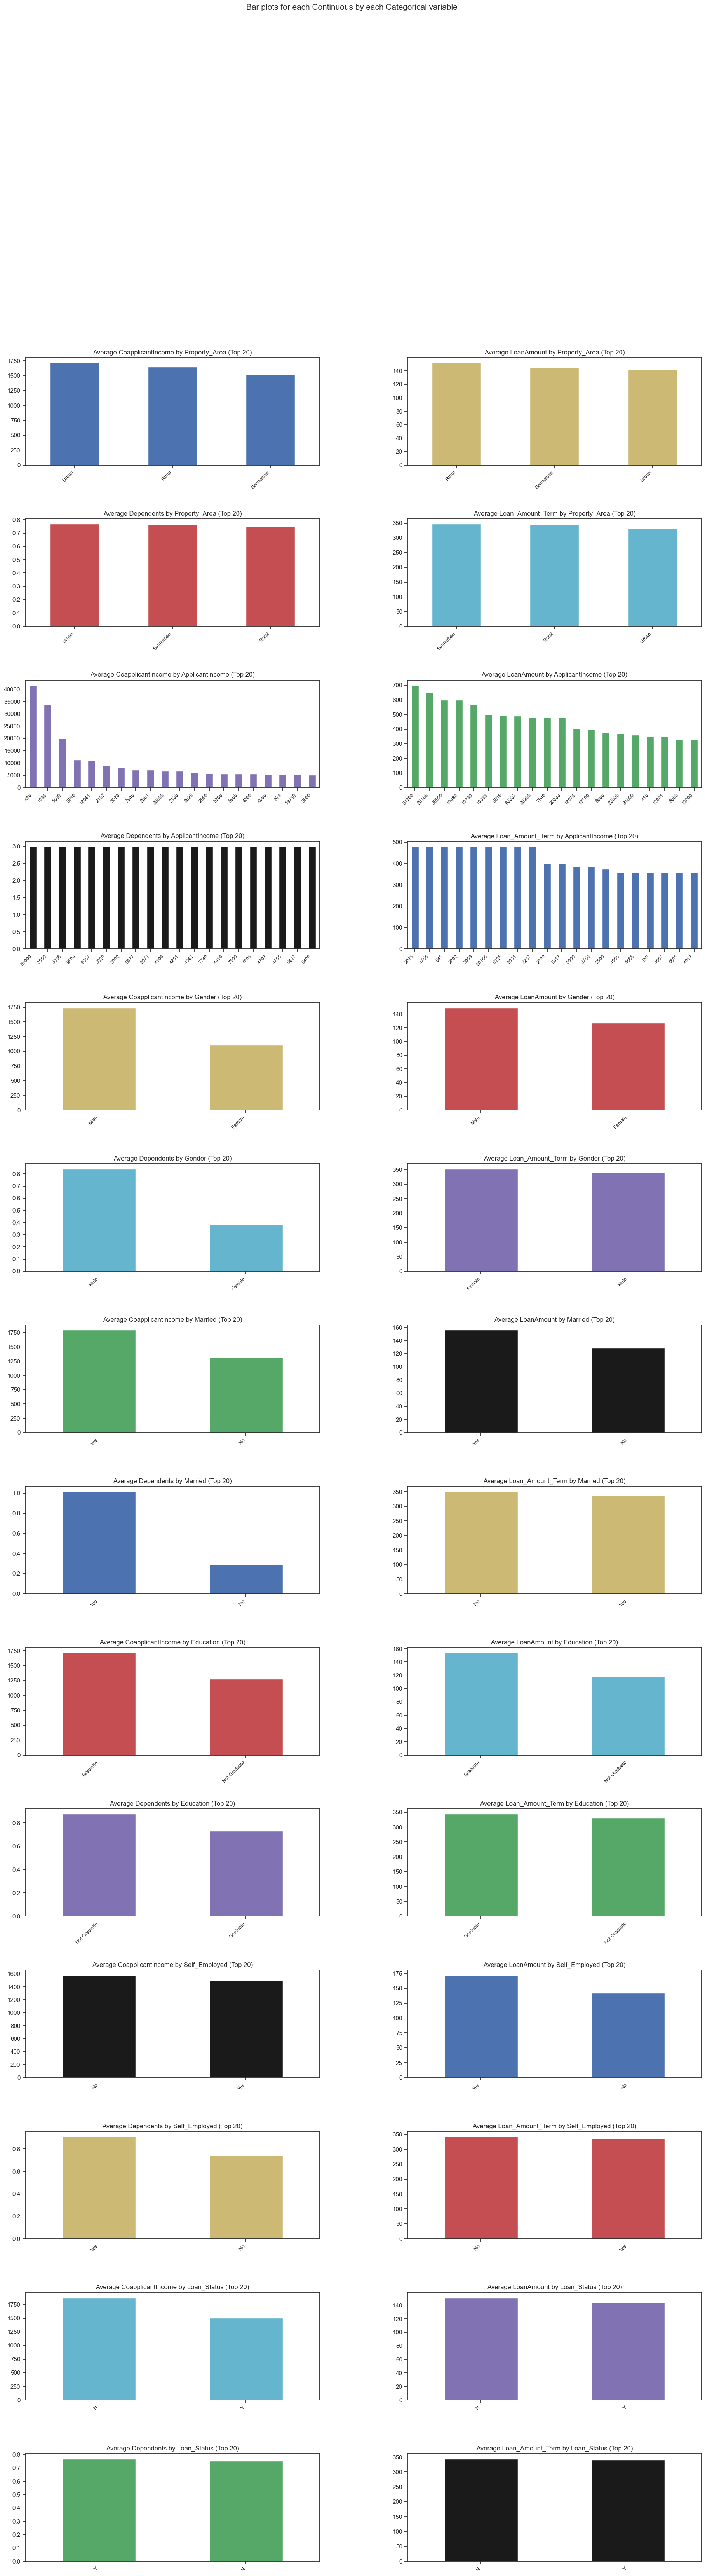

All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
AV.AutoViz(df)

In [10]:
# Take care of missing values:

# Gender
# Married
# Dependents
# Self_Employed
# LoanAmount
# Loan_Amount_Term
# Credit_History

<Axes: >

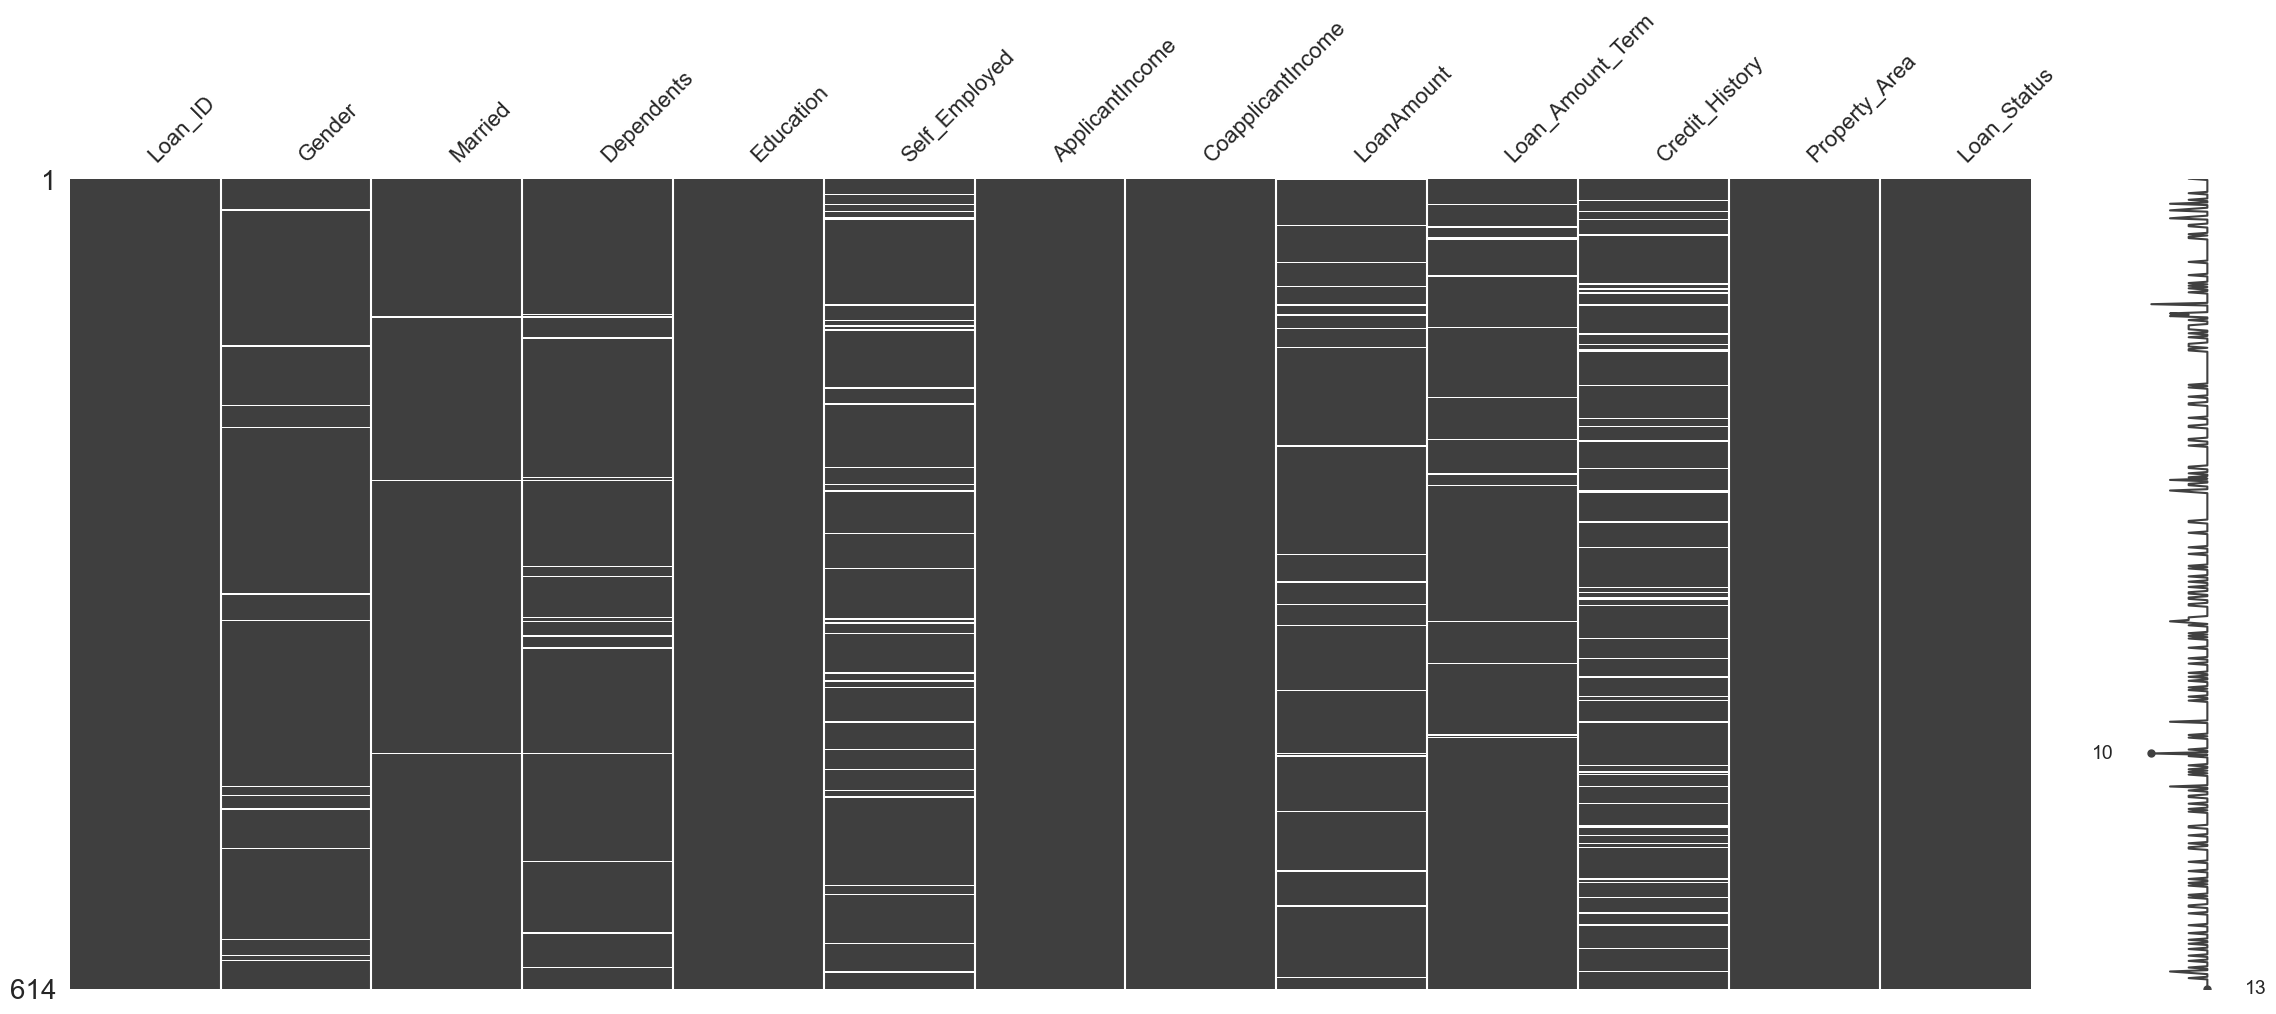

In [11]:
msno.matrix(df)

In [12]:
nan_columns = ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

In [13]:
nan_counts = df.isnull().sum()
nan_counts = nan_counts[nan_counts > 0] 
nan_percentage = (nan_counts / len(df)) * 100

nan_analysis = pd.DataFrame({
        'Column': nan_counts.index,
        'NaN Count': nan_counts.values,
        'NaN Percentage': nan_percentage.values})
print(nan_analysis)

        Column       NaN Count  NaN Percentage
0            Gender     13         2.117264   
1           Married      3         0.488599   
2        Dependents     15         2.442997   
3     Self_Employed     32         5.211726   
4        LoanAmount     22         3.583062   
5  Loan_Amount_Term     14         2.280130   
6    Credit_History     50         8.143322   


In [14]:
mode_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
df = df.drop(columns=['Loan_ID'])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
def label_encode_columns(df, columns):
    df_encoded = df.copy()
    for column in columns:
        le = LabelEncoder()
        # Temporarily fill NaN values to fit the encoder
        non_null_mask = df_encoded[column].notnull()
        df_encoded[column] = df_encoded[column].astype(str)
        df_encoded[column][non_null_mask] = le.fit_transform(df_encoded[column][non_null_mask])
        # Restore NaN values
        df_encoded[column] = df_encoded[column].replace('nan', pd.NA)
    return df_encoded

In [17]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
df = label_encode_columns(df, ['Married', 'Gender', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'])

In [19]:
from sklearn.impute import KNNImputer

imp_cols = ['LoanAmount', 'Loan_Amount_Term']
knn_imputer = KNNImputer(n_neighbors=1)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(df[imp_cols]),columns = imp_cols)

df['LoanAmount'] = imputed_data['LoanAmount']
df['Loan_Amount_Term'] = imputed_data['Loan_Amount_Term']

In [20]:

# Outliers

In [21]:
import matplotlib.pyplot as plt
def plot_with_boundaries(df, column):
    mean_val = df[column].mean()
    std_val = df[column].std()
    lower_sigma = mean_val - 3 * std_val
    upper_sigma = mean_val + 3 * std_val

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_iqr = Q1 - 1.5 * IQR
    upper_iqr = Q3 + 1.5 * IQR

 #   plt.figure(figsize=(10, 6))
    sns.stripplot(x=df[column])

    plt.axvline(mean_val, color='green', linestyle='--', label='Mean')
    plt.axvline(lower_sigma, color='red', linestyle='--', label='Lower 3-Sigma')
    plt.axvline(upper_sigma, color='red', linestyle='--', label='Upper 3-Sigma')
    plt.axvline(lower_iqr, color='blue', linestyle='--', label='Lower IQR')
    plt.axvline(upper_iqr, color='blue', linestyle='--', label='Upper IQR')

    plt.legend()
    plt.title(f'{column} with IQR and 3-Sigma Boundaries')
    plt.xlabel(column)
    plt.show()

In [22]:
incom_cols = ['ApplicantIncome','CoapplicantIncome']

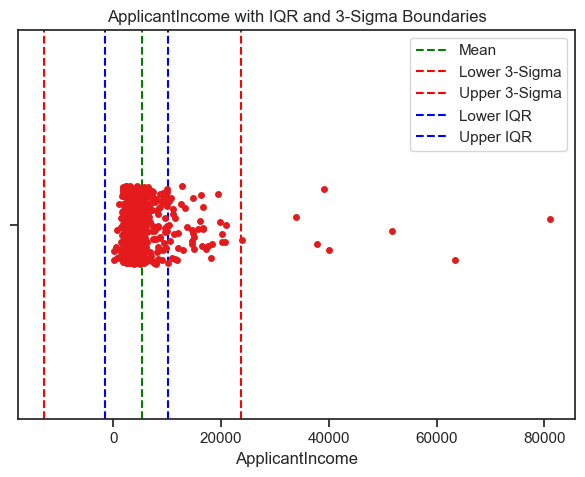

In [23]:
plot_with_boundaries(df, 'ApplicantIncome')

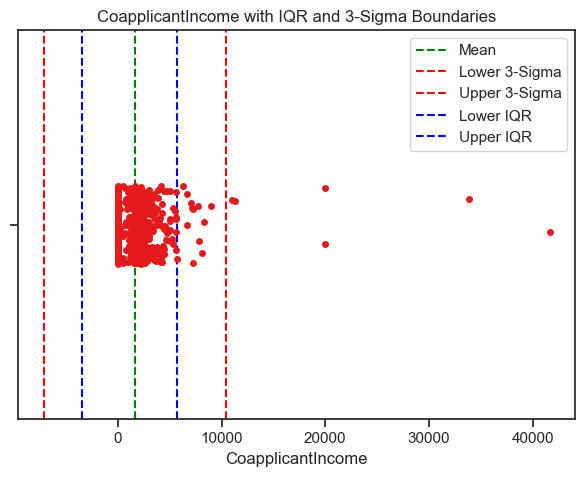

In [24]:
plot_with_boundaries(df, 'CoapplicantIncome')

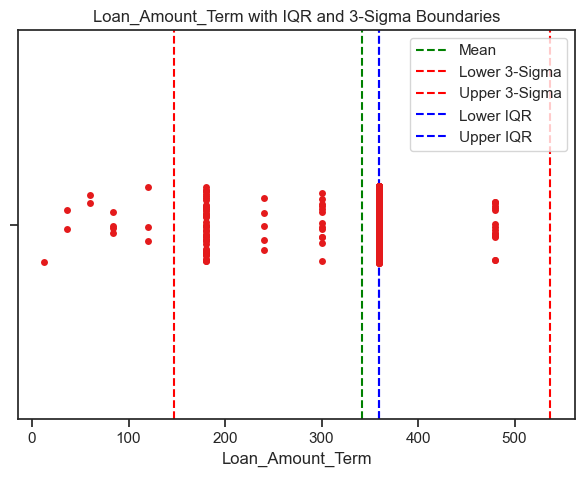

In [25]:
plot_with_boundaries(df, 'Loan_Amount_Term')

In [26]:
def transform_loan_term(term):
    if term < 360:
        return 300
    elif term > 360:
        return 480
    else:
        return term

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(transform_loan_term)

In [27]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    524
300.0     75
480.0     15
Name: count, dtype: int64

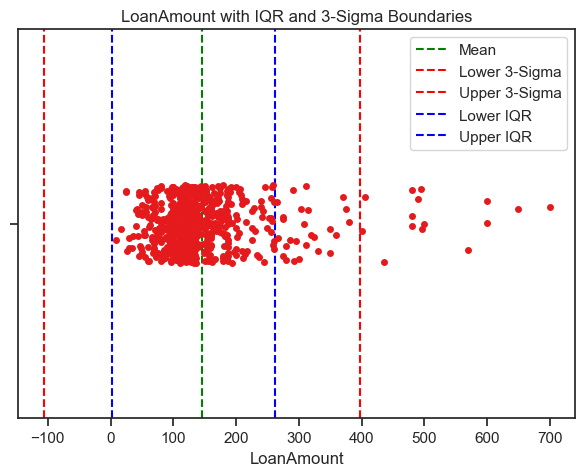

In [28]:
plot_with_boundaries(df, 'LoanAmount')

In [29]:
def cap_outliers(df, columns, sigma=3):
    
    for col in columns:
        if col in df.columns:
            mean = df[col].mean()
            std = df[col].std()
            lower_bound = mean - sigma * std
            upper_bound = mean + sigma * std
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

In [30]:
def cap_outliers_absolute(df, columns, lower_bound, upper_bound):
    for col in columns:
        if col in df.columns:
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

In [31]:
def replace_outliers_with_mode(df, columns, sigma=3):
    
    for col in columns:
        if col in df.columns:
            mean = df[col].mean()
            std = df[col].std()
            lower_bound = mean - sigma * std
            upper_bound = mean + sigma * std
            mode = df[col].mode()[0]
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), mode, df[col])

    return df

In [32]:
def replace_outliers_with_mean(df, columns, sigma=3):
    
    for col in columns:
        if col in df.columns:
            mean = df[col].mean()
            std = df[col].std()
            lower_bound = mean - sigma * std
            upper_bound = mean + sigma * std
            mode = df[col].mode()[0]
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), mean, df[col])

    return df

In [33]:
df = cap_outliers(df, incom_cols)

In [34]:
df = cap_outliers_absolute(df, ['LoanAmount'], 0, 400)

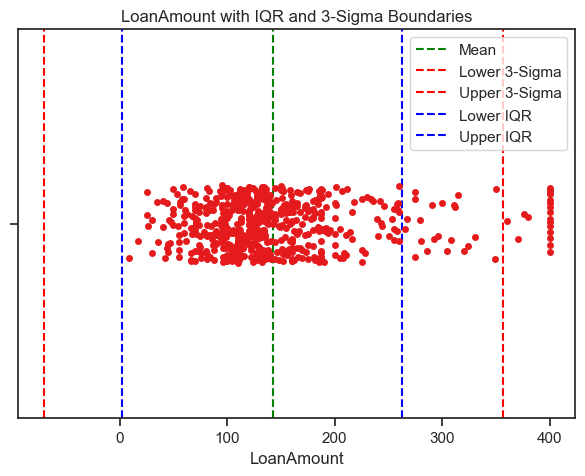

In [35]:
plot_with_boundaries(df, 'LoanAmount')

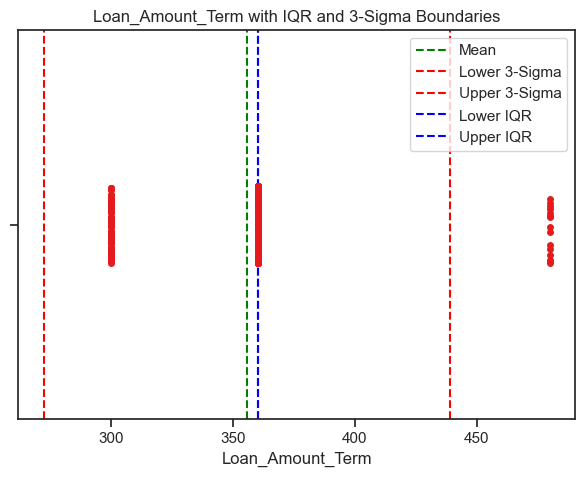

In [36]:
plot_with_boundaries(df, 'Loan_Amount_Term')

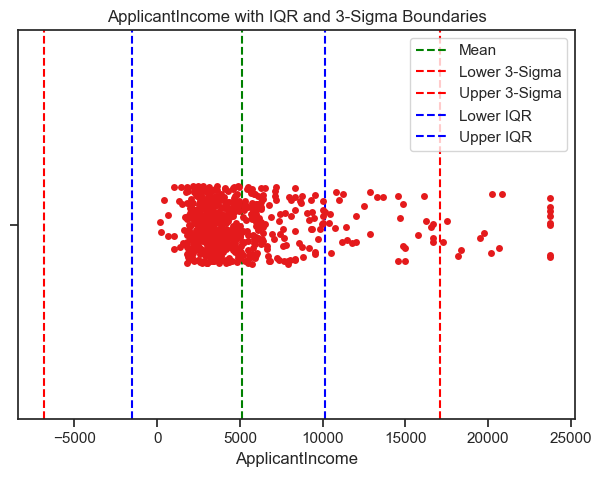

In [37]:
plot_with_boundaries(df, 'ApplicantIncome')

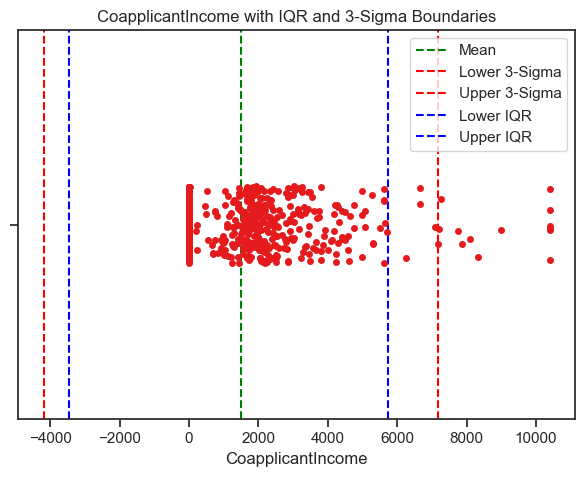

In [38]:
plot_with_boundaries(df, 'CoapplicantIncome')

In [39]:
df.to_csv("loans_clean4.csv")

In [40]:
# EDA post cleanup

In [41]:
df = pd.read_csv("loans_clean4.csv")

In [42]:
df.shape

(614, 13)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 62.5 KB


In [44]:
df.describe()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5109.046701,1498.490009,142.925081,355.602606,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,3990.938759,1896.208579,71.215943,27.811033,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,300.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,165.000000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,23730.584304,10399.990906,400.000000,480.000000,1.000000,2.000000,1.000000


In [45]:
# Field types and basic info

def summarize_dataframe(df):
    summary = {
        'Series': [],
        'Type': [],
        'Unique Values': [],
        'Min Value': [],
        'Max Value': [],
        'Mean Value': [],
        'Mode Value': []
    }

    for column in df.columns:
        summary['Series'].append(column)
        summary['Type'].append(df[column].dtype)
        summary['Unique Values'].append(df[column].nunique())
        summary['Min Value'].append(df[column].min() if pd.api.types.is_numeric_dtype(df[column]) else None)
        summary['Max Value'].append(df[column].max() if pd.api.types.is_numeric_dtype(df[column]) else None)
        summary['Mean Value'].append(df[column].mean() if pd.api.types.is_numeric_dtype(df[column]) else None)
        summary['Mode Value'].append(df[column].mode()[0] if not df[column].mode().empty else None)

    return pd.DataFrame(summary)

In [46]:
summarize_dataframe(df)

,Series,Type,Unique Values,Min Value,Max Value,Mean Value,Mode Value
0,Unnamed: 0,int64,614,0.0,613.000000,306.500000,0.0
1,Gender,int64,2,0.0,1.000000,0.817590,1.0
2,Married,int64,2,0.0,1.000000,0.653094,1.0
3,Dependents,float64,4,0.0,3.000000,0.744300,0.0
4,Education,int64,2,0.0,1.000000,0.218241,0.0
5,Self_Employed,int64,2,0.0,1.000000,0.133550,0.0
6,ApplicantIncome,float64,498,150.0,23730.584304,5109.046701,2500.0
7,CoapplicantIncome,float64,283,0.0,10399.990906,1498.490009,0.0
8,LoanAmount,float64,192,9.0,400.000000,142.925081,128.0
9,Loan_Amount_Term,float64,3,300.0,480.000000,355.602606,360.0


Shape of your Data Set loaded: (614, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  6
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    13 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
To fix these data quality issues in the dataset, impor

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,613.000000,Possible ID column: drop before modeling step.
Gender,int64,0.000000,0,0.000000,1.000000,No issue
Married,int64,0.000000,0,0.000000,1.000000,No issue
Dependents,float64,0.000000,NA,0.000000,3.000000,Column has 51 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Education,int64,0.000000,0,0.000000,1.000000,No issue
Self_Employed,int64,0.000000,0,0.000000,1.000000,No issue
ApplicantIncome,float64,0.000000,NA,150.000000,23730.584304,Column has 50 outliers greater than upper bound (10171.25) or lower than lower bound(-1498.75). Cap them or remove them.
CoapplicantIncome,float64,0.000000,NA,0.000000,10399.990906,Column has 18 outliers greater than upper bound (5743.12) or lower than lower bound(-3445.88). Cap them or remove them.
LoanAmount,float64,0.000000,NA,9.000000,400.000000,Column has 41 outliers greater than upper bound (262.50) or lower than lower bound(2.50). Cap them or remove them.
Loan_Amount_Term,float64,0.000000,NA,300.000000,480.000000,Column has 90 outliers greater than upper bound (360.00) or lower than lower bound(360.00). Cap them or remove them.


Number of All Scatter Plots = 15


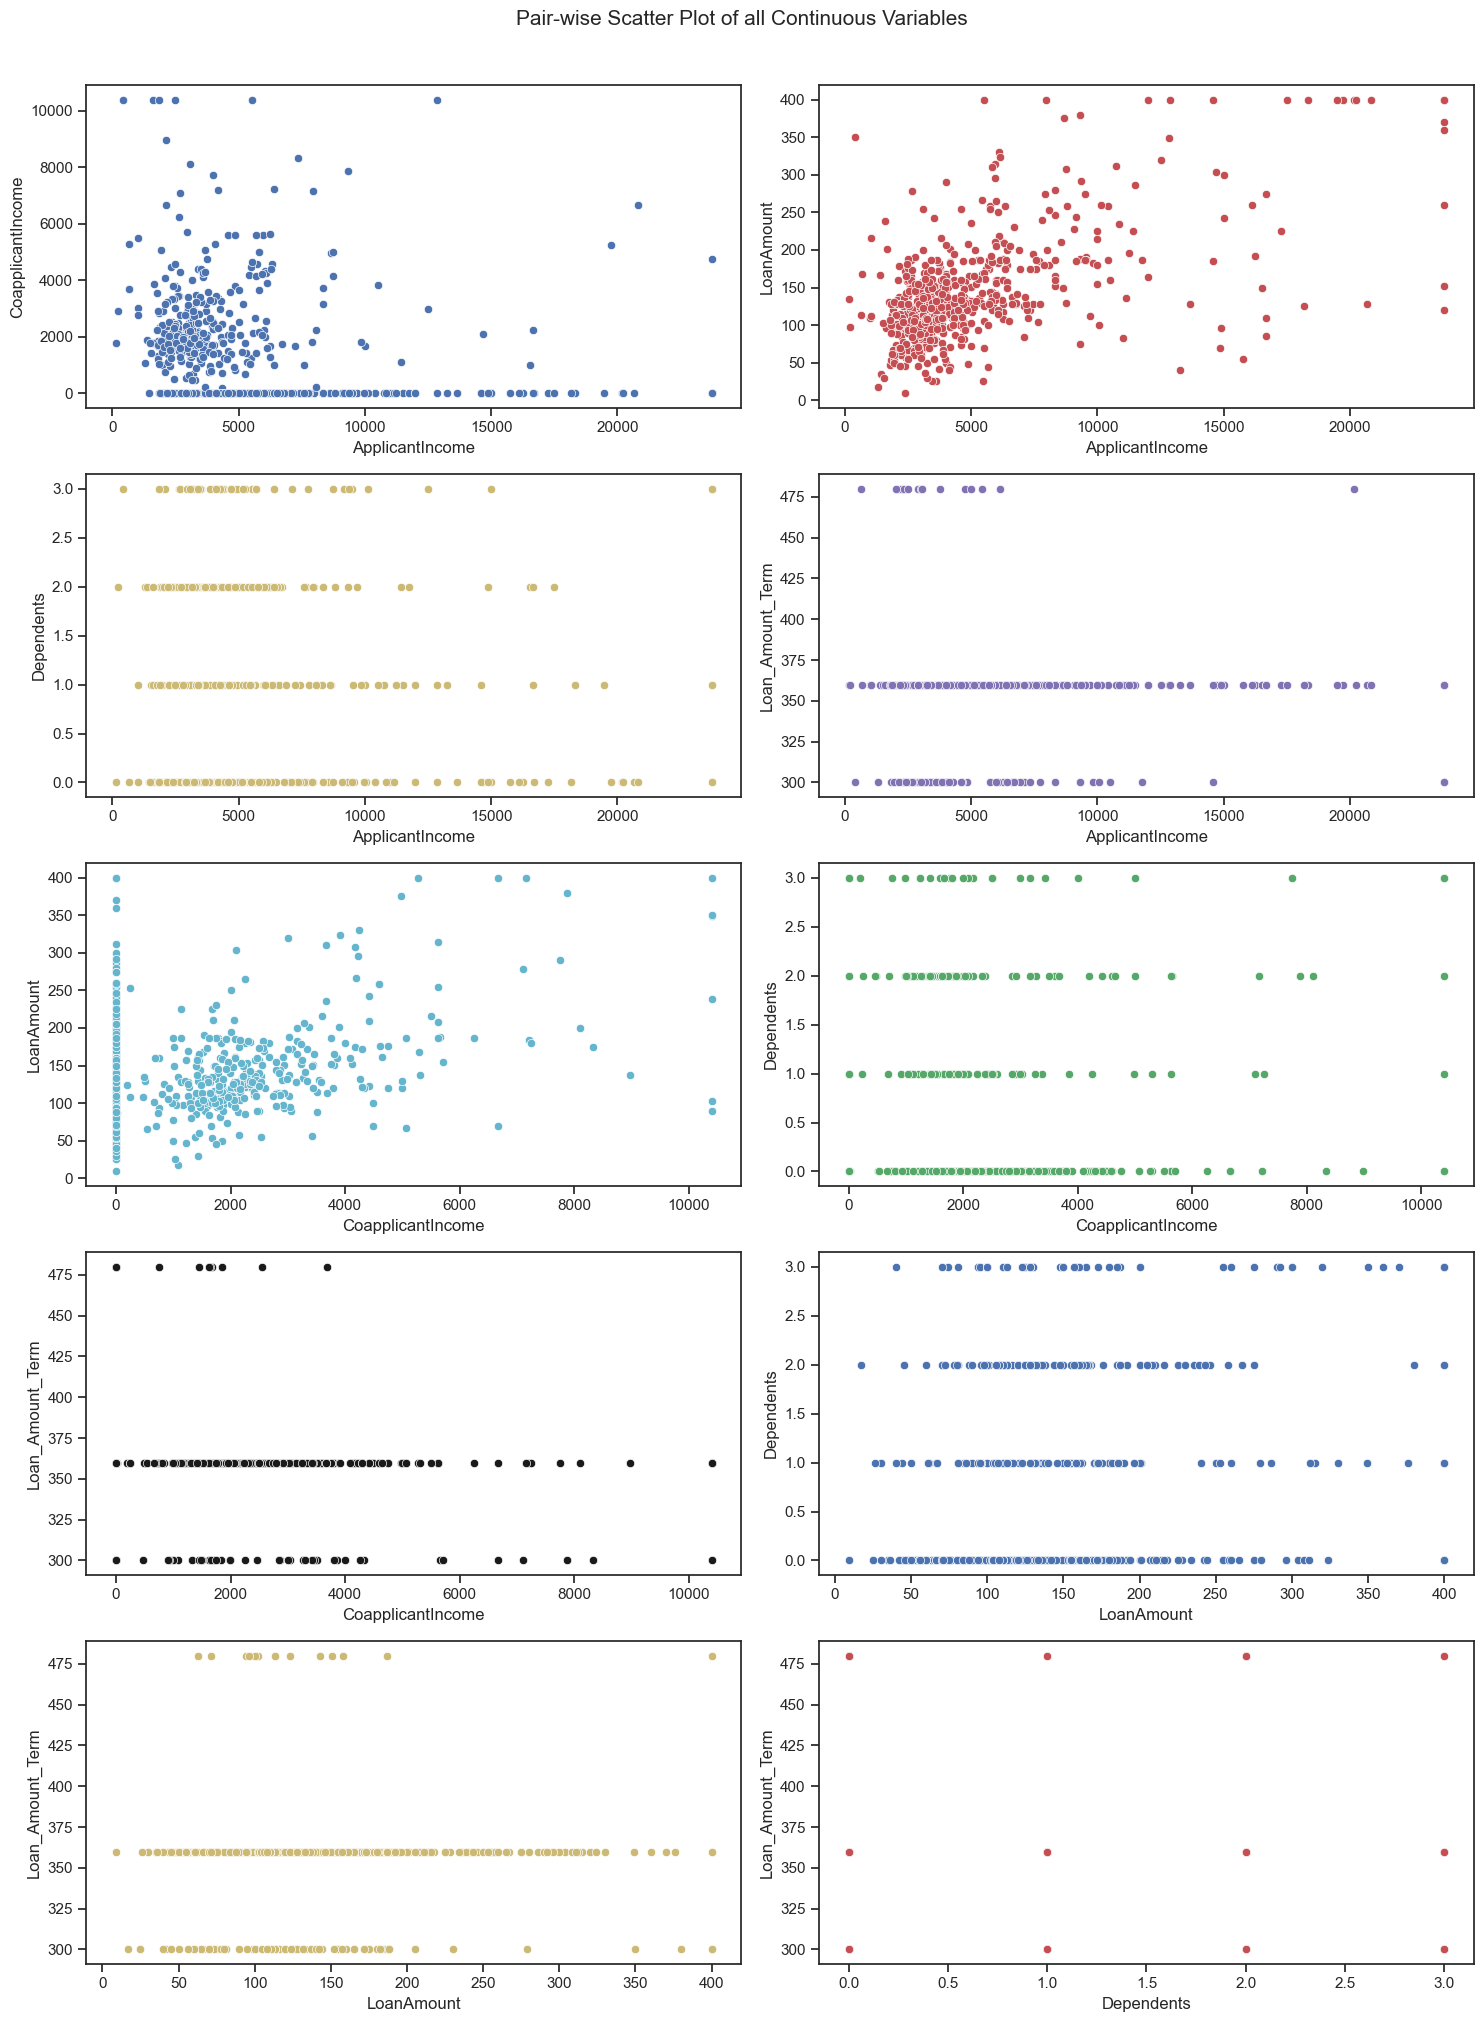

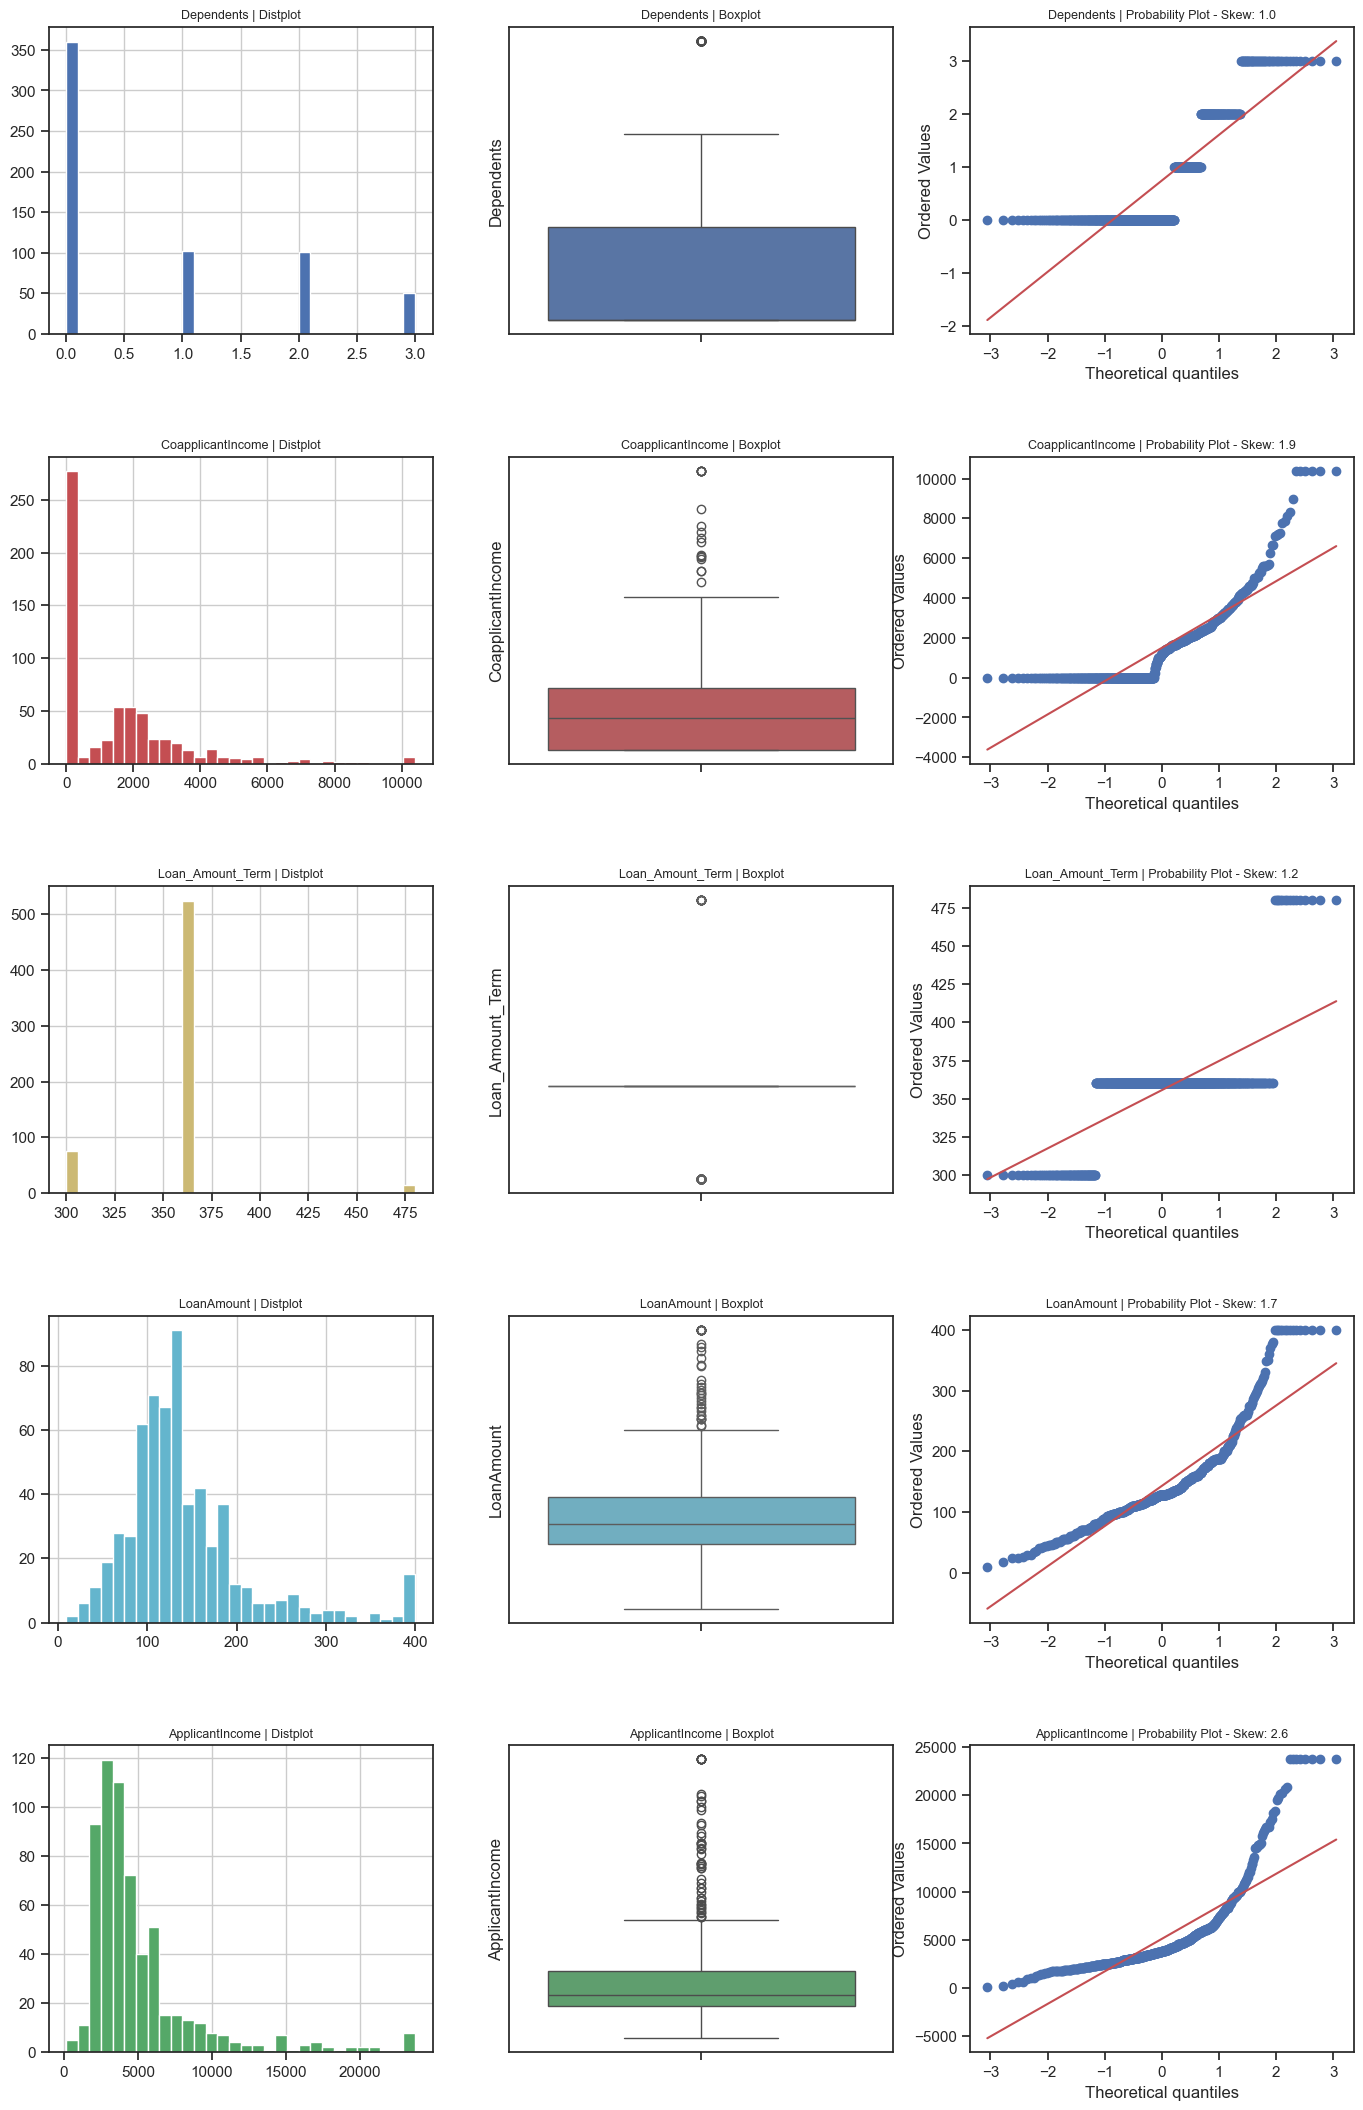

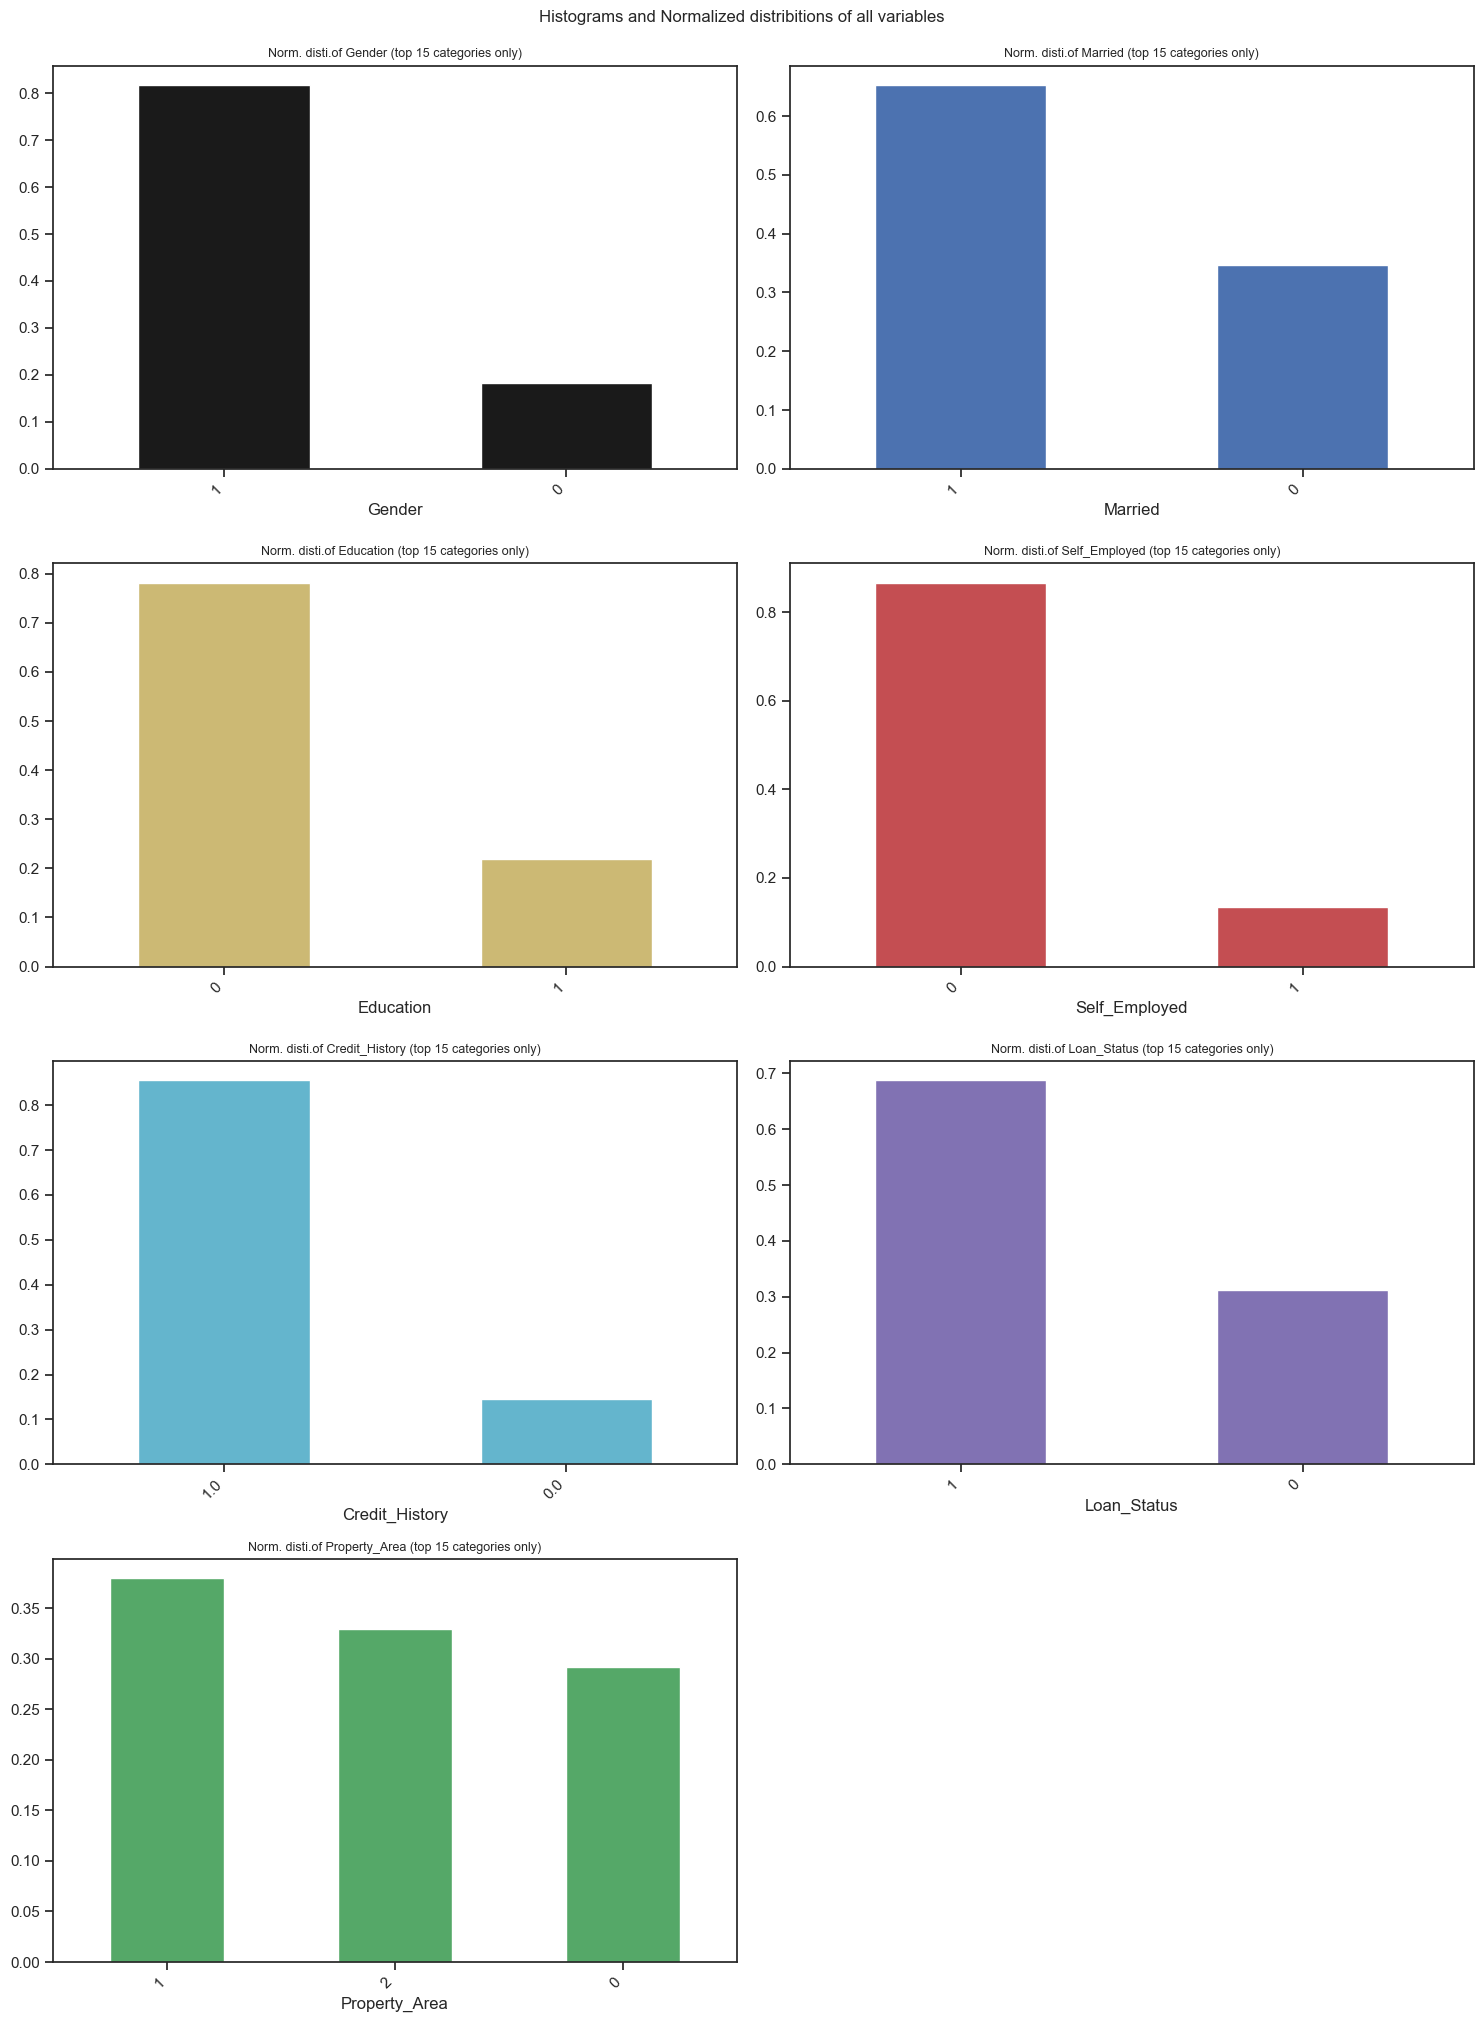

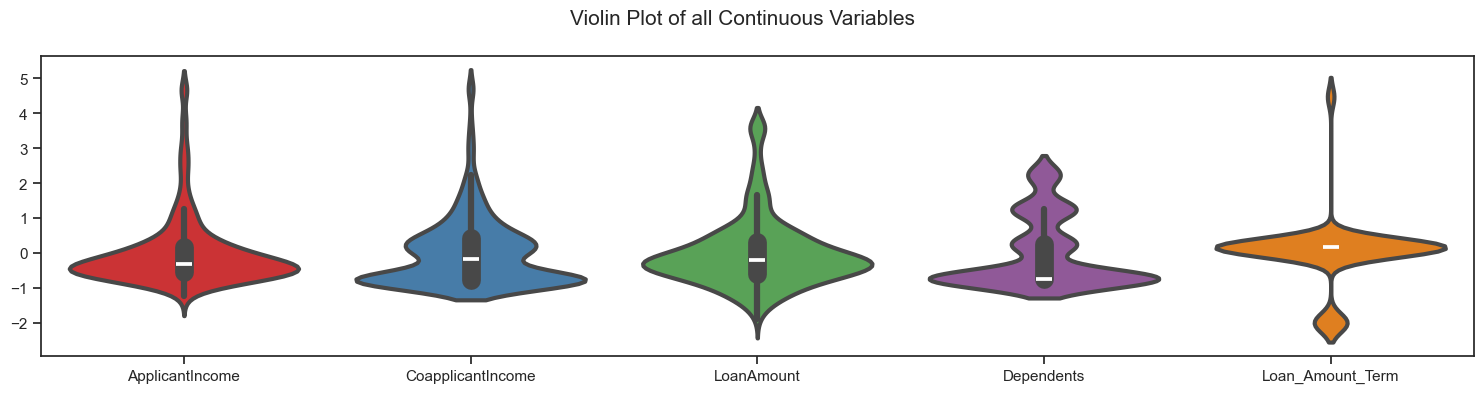

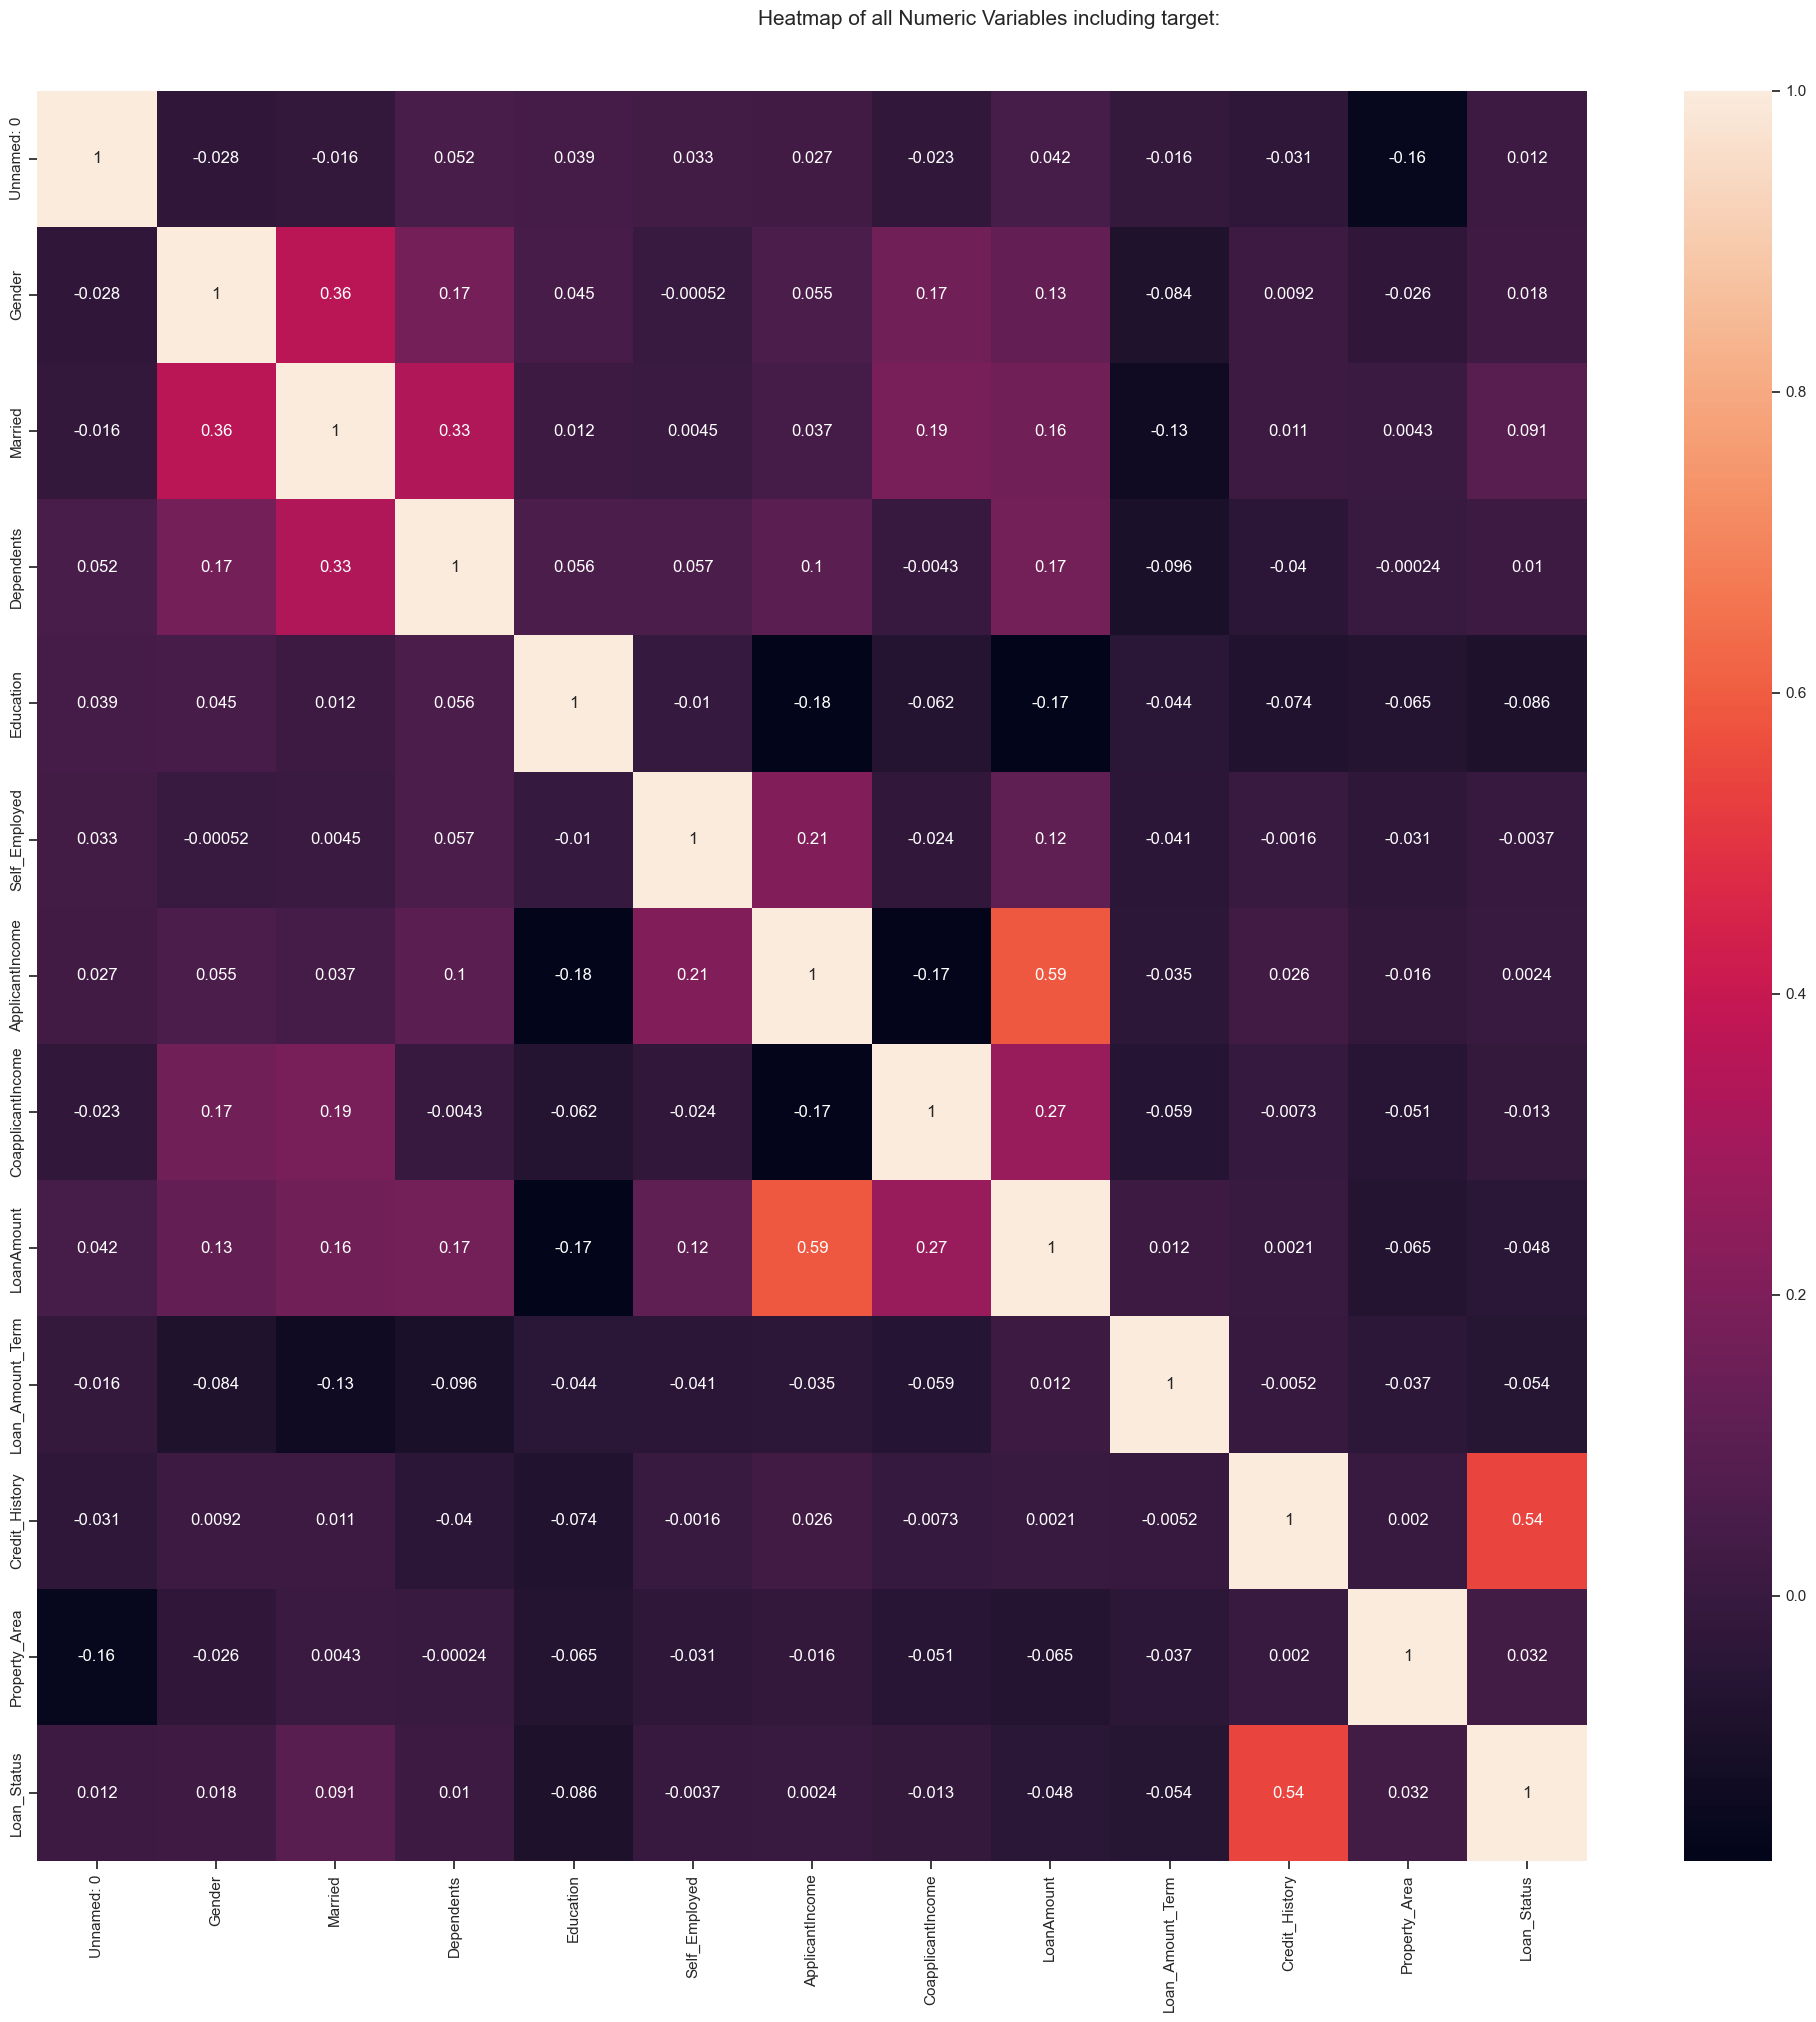

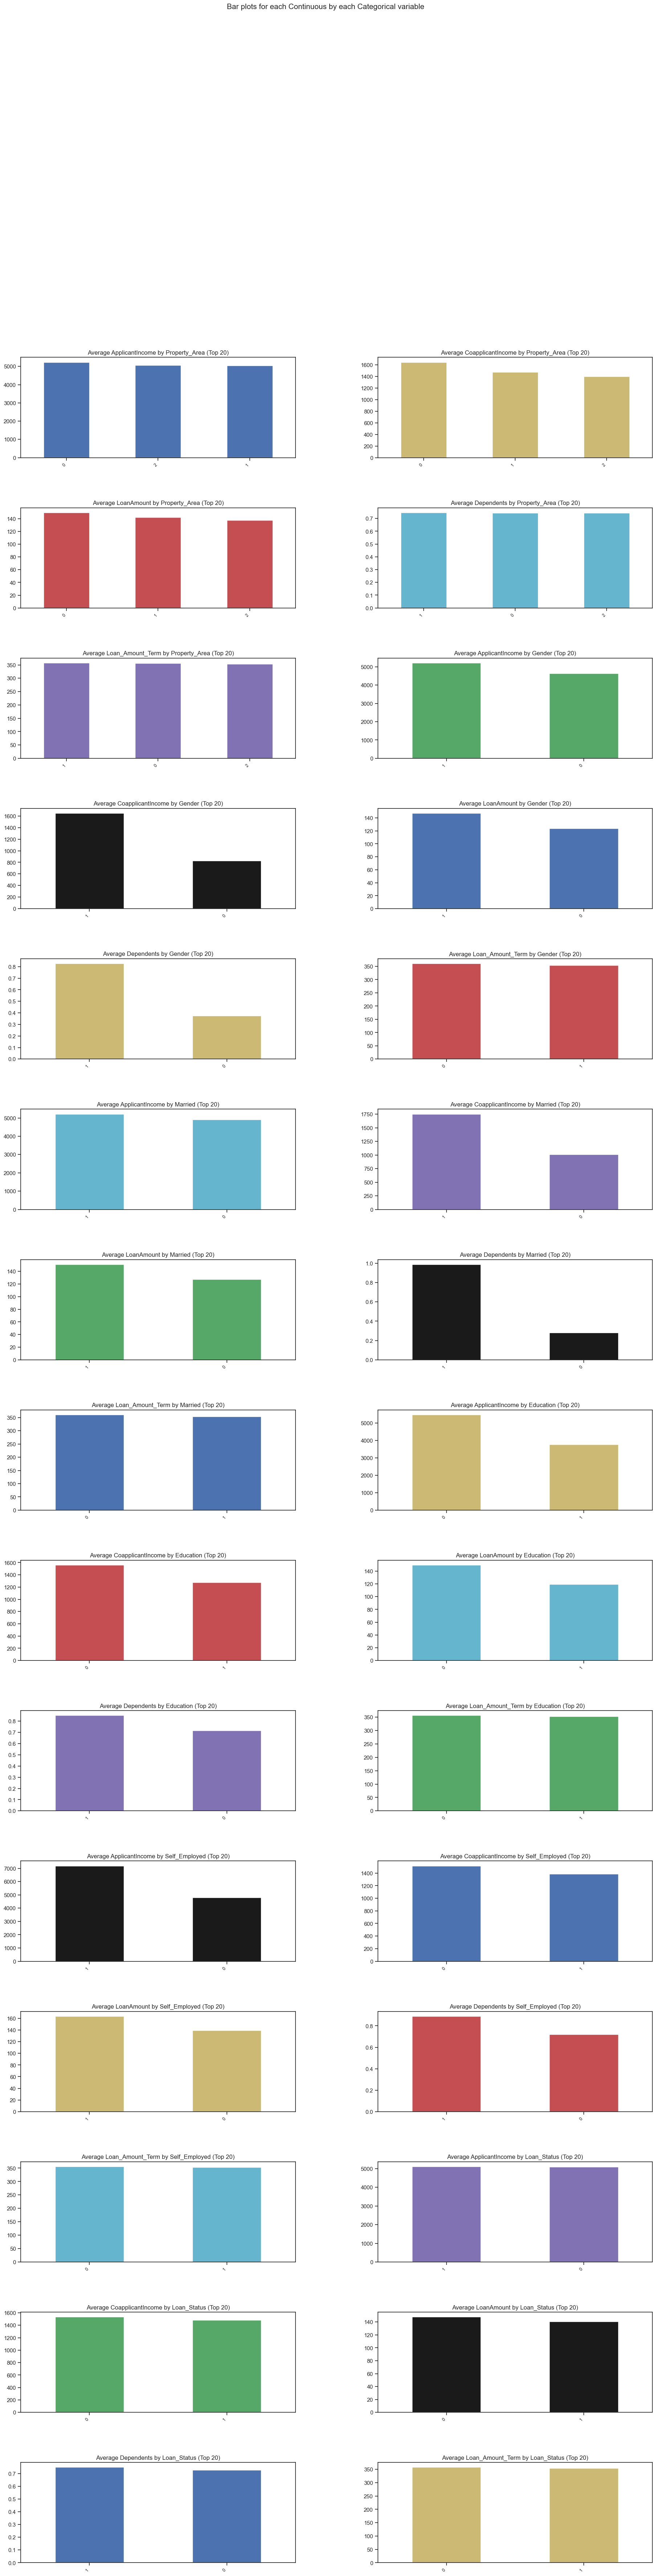

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0.0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3.0,0,0,4106.0,0.0,40.0,300.0,1.0,0,1
611,611,1,1,1.0,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2.0,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [47]:
AV.AutoViz(df)

In [48]:
def plot_loan_amount_distribution(df, x_column, hue_columns):
      for hue_col in hue_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=x_column, hue=hue_col, kde=True, multiple='stack')
        plt.title(f'{x_column} Distribution by {hue_col}')
        plt.xlabel(x_column.replace('_', ' '))
        plt.ylabel('Frequency')
        plt.show()

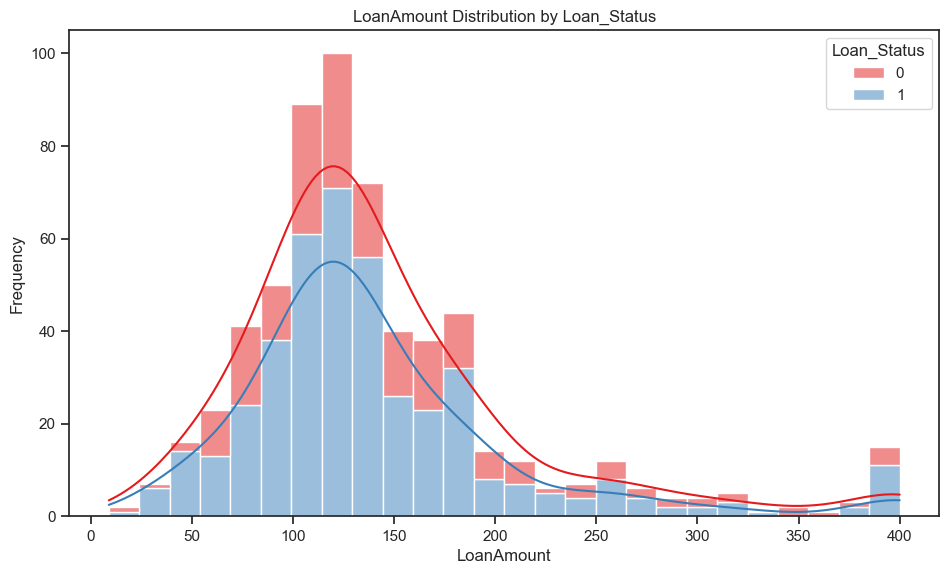

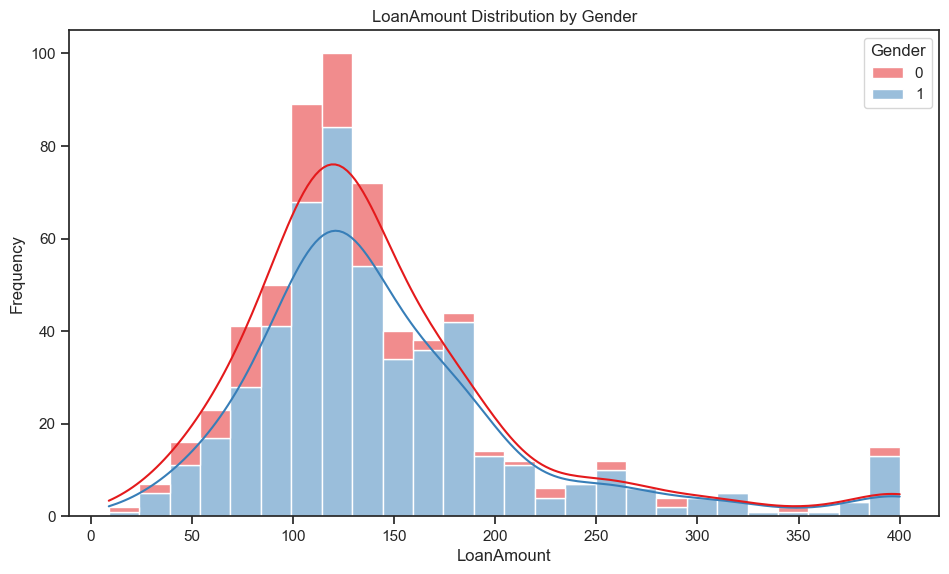

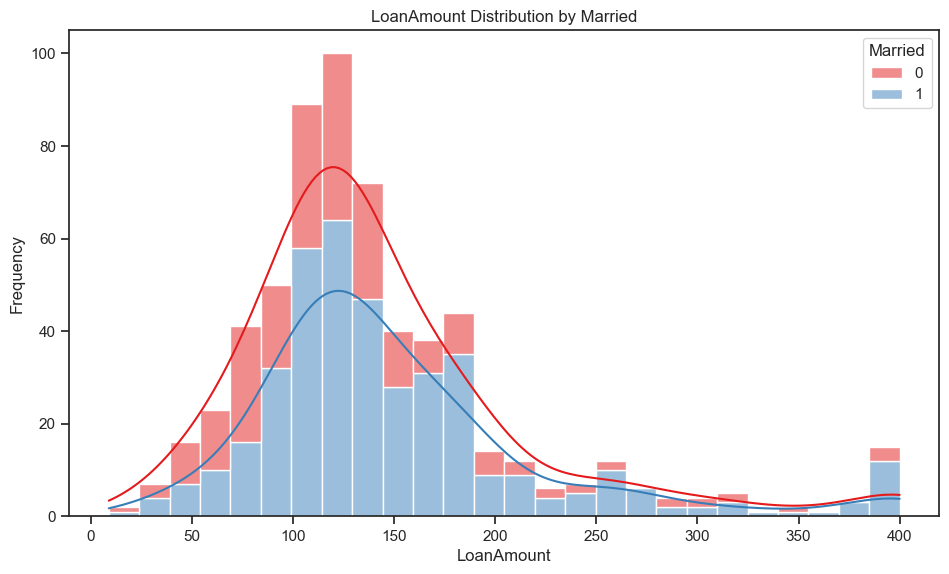

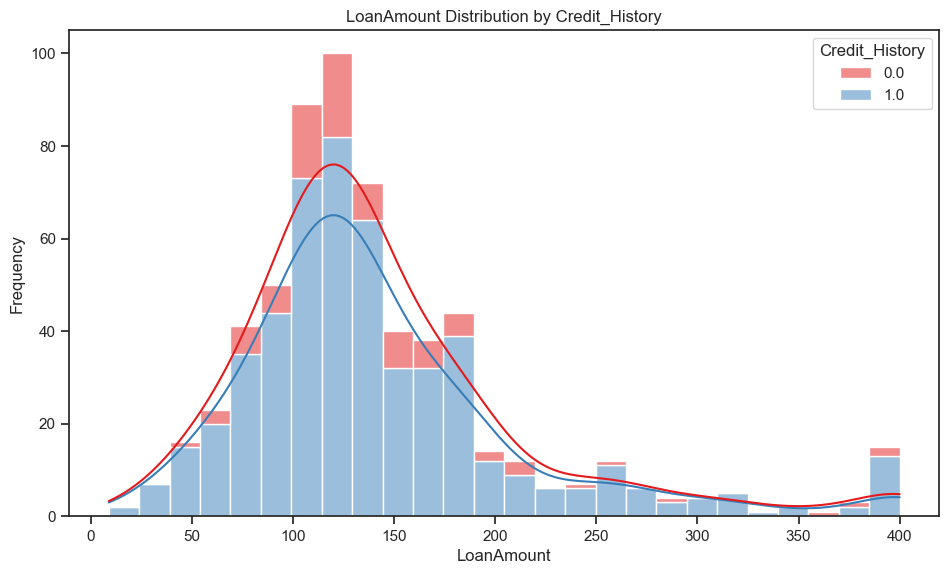

In [49]:
plot_loan_amount_distribution(df, 'LoanAmount', ['Loan_Status', 'Gender', 'Married', 'Credit_History'])

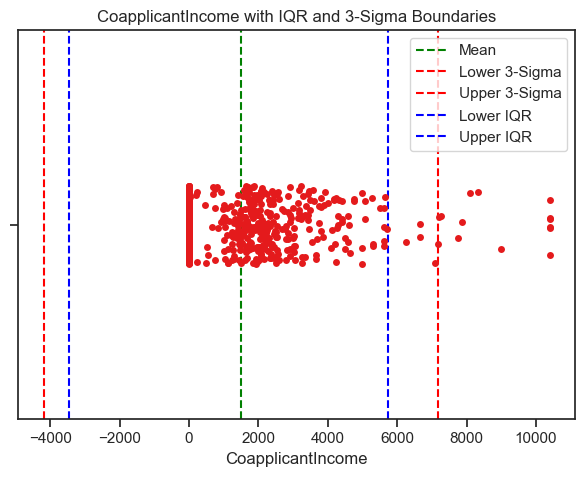

In [50]:
plot_with_boundaries(df, 'CoapplicantIncome')

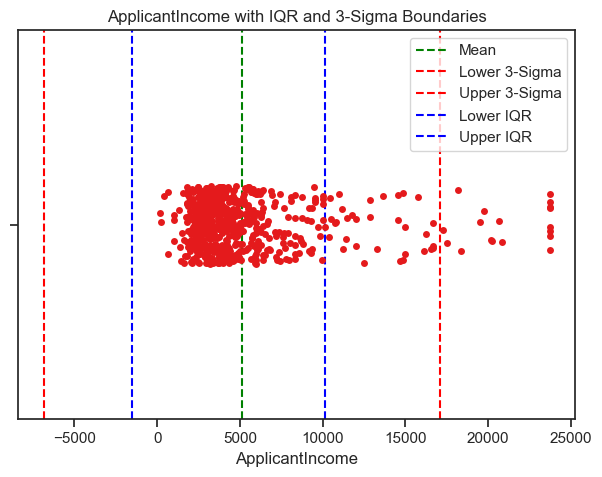

In [51]:
plot_with_boundaries(df, 'ApplicantIncome')

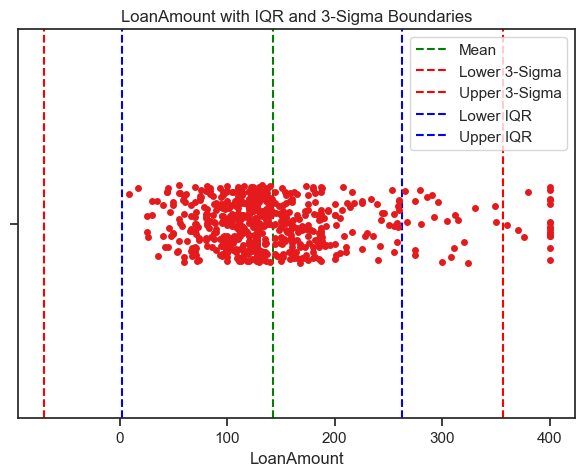

In [52]:
plot_with_boundaries(df, 'LoanAmount')

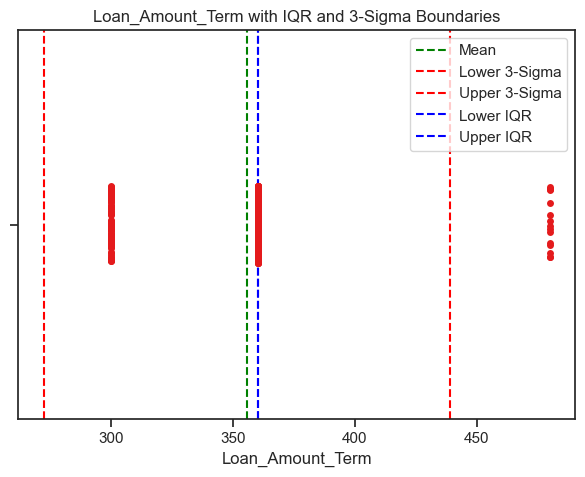

In [53]:
plot_with_boundaries(df, 'Loan_Amount_Term')

In [54]:
y=df['Loan_Status']
X = df.drop(columns=['Loan_Status'])

        Feature        Lasso  SVM  GradientBoost  RandomForest  Sum
0          Unnamed: 0    1     1         1              1        4 
1              Gender    0     1         1              1        3 
2             Married    1     1         1              1        4 
3          Dependents    0     1         1              1        3 
4           Education    1     1         1              1        4 
5       Self_Employed    0     1         1              1        3 
6     ApplicantIncome    1     1         1              1        4 
7   CoapplicantIncome    1     1         1              1        4 
8          LoanAmount    1     1         1              1        4 
9    Loan_Amount_Term    1     1         1              1        4 
10     Credit_History    1     1         1              1        4 
11      Property_Area    1     1         1              1        4 


In [56]:
variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
anova_results = []

for var in variables:
    model = ols(f'{var} ~ C(species)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_table['variable'] = var
    anova_results.append(anova_table)

anova_results_df = pd.concat(anova_results)
anova_results_df = anova_results_df.reset_index().sort_values(by='PR(>F)')

print(anova_results_df)

NameError: name 'ols' is not defined